In [5]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 

In [6]:
import matplotlib.pyplot as plt

In [7]:
ativo = pd.read_csv('petr_h1.csv', sep = ';')

In [8]:
segunda_hora = 11

In [9]:
datas = ativo.iloc[:,0:1].values.tolist()
ano    = []
mes    = []
dia    = []
hora   = []
minuto = []

for i in range(len(datas)):
    data_ = datas[i][0].replace(' ', '-').replace('.','-').replace(':','-').split('-')
    
    ano.append(int(data_[0]))
    mes.append(int(data_[1]))
    dia.append(int(data_[2]))
    hora.append(int(data_[3]))
    minuto.append(int(data_[4]))
    
ativo['Ano']    = ano
ativo['Mes']    = mes
ativo['Dia']    = dia
ativo['Hora']   = hora
ativo['Minuto'] = minuto

In [10]:
ativo['DiaMesAno'] = ativo['Dia'].apply(str) + '-' + ativo['Mes'].apply(str) + '-' + ativo['Ano'].apply(str)
ativo['MesAno'] = ativo['Mes'].apply(str) + '-' + ativo['Ano'].apply(str)
ativo['DiaMesAnoHora'] = ativo['Dia'].apply(str) + '-' + ativo['Mes'].apply(str) + '-' + ativo['Ano'].apply(str) +'-' +ativo['Hora'].apply(str)
dias_base = ativo.drop_duplicates('DiaMesAno')['DiaMesAno'].values.ravel()

meses_base = ativo.drop_duplicates('MesAno')['MesAno'].values.ravel()
horas_base = ativo.drop_duplicates('DiaMesAnoHora')['DiaMesAnoHora'].values.ravel()


In [11]:
abertura_dia   = []
minima_dia     = []
maxia_dia      = []
fechamento_dia = []
volume_dia     = []
ticks_dia      = []
volume_dia_direcional = []
vol_p = []
vol_n = []

vol_p_quant = []
vol_n_quant = []
for i in range(len(dias_base)):
    
    dia_atual = dias_base[i]
    
    ativo_    = ativo[ativo['DiaMesAno'] == dia_atual]
    
    abertura_     = ativo_['Open'][0:1].values.ravel()[0]
    minima_       = ativo_['Low'].min()
    maxima_       = ativo_['High'].max()
    fechamento_   = ativo_['Close'][len(ativo_) - 1 : len(ativo_)].values.ravel()[0]
    tick_         = ativo_['Tick'].sum()
    volume_       = ativo_['Volume'].sum()
    
    ativo_['VolumeDirecional'] = np.where(ativo_['Close'] > ativo_['Open'], ativo_['Volume'],
                                          np.where(ativo_['Close'] < ativo_['Open'], -ativo_['Volume'],0) )
    
    vol_dir = ativo_['VolumeDirecional'].sum()
    vol_dir_p_ = ativo_['VolumeDirecional'][ativo_['VolumeDirecional'] > 0].shape[0]
    vol_dir_n_ = ativo_['VolumeDirecional'][ativo_['VolumeDirecional'] < 0].shape[0]
    
    soma_pos_vol = ativo_['VolumeDirecional'][ativo_['VolumeDirecional'] > 0].sum()
    soma_neg_vol = ativo_['VolumeDirecional'][ativo_['VolumeDirecional'] < 0].sum()
    
    
    abertura_dia.append(abertura_)
    minima_dia.append(minima_)
    maxia_dia.append(maxima_)
    fechamento_dia.append(fechamento_)
    
    volume_dia.append(volume_)
    ticks_dia.append(tick_)
    
    volume_dia_direcional.append(vol_dir)
    
    vol_p_quant.append(vol_dir_p_)
    vol_n_quant.append(vol_dir_n_)
    
    vol_p.append(soma_pos_vol)
    vol_n.append(soma_neg_vol)
    
    print('Restam : ' + str(len(dias_base) - (i+1)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Restam : 3496
Restam : 3495
Restam : 3494
Restam : 3493
Restam : 3492
Restam : 3491
Restam : 3490
Restam : 3489
Restam : 3488
Restam : 3487
Restam : 3486
Restam : 3485
Restam : 3484
Restam : 3483
Restam : 3482
Restam : 3481
Restam : 3480
Restam : 3479
Restam : 3478
Restam : 3477
Restam : 3476
Restam : 3475
Restam : 3474
Restam : 3473
Restam : 3472
Restam : 3471
Restam : 3470
Restam : 3469
Restam : 3468
Restam : 3467
Restam : 3466
Restam : 3465
Restam : 3464
Restam : 3463
Restam : 3462
Restam : 3461
Restam : 3460
Restam : 3459
Restam : 3458
Restam : 3457
Restam : 3456
Restam : 3455
Restam : 3454
Restam : 3453
Restam : 3452
Restam : 3451
Restam : 3450
Restam : 3449
Restam : 3448
Restam : 3447
Restam : 3446
Restam : 3445
Restam : 3444
Restam : 3443
Restam : 3442
Restam : 3441
Restam : 3440
Restam : 3439
Restam : 3438
Restam : 3437
Restam : 3436
Restam : 3435
Restam : 3434
Restam : 3433
Restam : 3432
Restam : 3431
Restam : 3430
Restam : 3429
Restam : 3428
Restam : 3427
Restam : 3426
Restam

Restam : 2910
Restam : 2909
Restam : 2908
Restam : 2907
Restam : 2906
Restam : 2905
Restam : 2904
Restam : 2903
Restam : 2902
Restam : 2901
Restam : 2900
Restam : 2899
Restam : 2898
Restam : 2897
Restam : 2896
Restam : 2895
Restam : 2894
Restam : 2893
Restam : 2892
Restam : 2891
Restam : 2890
Restam : 2889
Restam : 2888
Restam : 2887
Restam : 2886
Restam : 2885
Restam : 2884
Restam : 2883
Restam : 2882
Restam : 2881
Restam : 2880
Restam : 2879
Restam : 2878
Restam : 2877
Restam : 2876
Restam : 2875
Restam : 2874
Restam : 2873
Restam : 2872
Restam : 2871
Restam : 2870
Restam : 2869
Restam : 2868
Restam : 2867
Restam : 2866
Restam : 2865
Restam : 2864
Restam : 2863
Restam : 2862
Restam : 2861
Restam : 2860
Restam : 2859
Restam : 2858
Restam : 2857
Restam : 2856
Restam : 2855
Restam : 2854
Restam : 2853
Restam : 2852
Restam : 2851
Restam : 2850
Restam : 2849
Restam : 2848
Restam : 2847
Restam : 2846
Restam : 2845
Restam : 2844
Restam : 2843
Restam : 2842
Restam : 2841
Restam : 2840
Restam

Restam : 2325
Restam : 2324
Restam : 2323
Restam : 2322
Restam : 2321
Restam : 2320
Restam : 2319
Restam : 2318
Restam : 2317
Restam : 2316
Restam : 2315
Restam : 2314
Restam : 2313
Restam : 2312
Restam : 2311
Restam : 2310
Restam : 2309
Restam : 2308
Restam : 2307
Restam : 2306
Restam : 2305
Restam : 2304
Restam : 2303
Restam : 2302
Restam : 2301
Restam : 2300
Restam : 2299
Restam : 2298
Restam : 2297
Restam : 2296
Restam : 2295
Restam : 2294
Restam : 2293
Restam : 2292
Restam : 2291
Restam : 2290
Restam : 2289
Restam : 2288
Restam : 2287
Restam : 2286
Restam : 2285
Restam : 2284
Restam : 2283
Restam : 2282
Restam : 2281
Restam : 2280
Restam : 2279
Restam : 2278
Restam : 2277
Restam : 2276
Restam : 2275
Restam : 2274
Restam : 2273
Restam : 2272
Restam : 2271
Restam : 2270
Restam : 2269
Restam : 2268
Restam : 2267
Restam : 2266
Restam : 2265
Restam : 2264
Restam : 2263
Restam : 2262
Restam : 2261
Restam : 2260
Restam : 2259
Restam : 2258
Restam : 2257
Restam : 2256
Restam : 2255
Restam

Restam : 1738
Restam : 1737
Restam : 1736
Restam : 1735
Restam : 1734
Restam : 1733
Restam : 1732
Restam : 1731
Restam : 1730
Restam : 1729
Restam : 1728
Restam : 1727
Restam : 1726
Restam : 1725
Restam : 1724
Restam : 1723
Restam : 1722
Restam : 1721
Restam : 1720
Restam : 1719
Restam : 1718
Restam : 1717
Restam : 1716
Restam : 1715
Restam : 1714
Restam : 1713
Restam : 1712
Restam : 1711
Restam : 1710
Restam : 1709
Restam : 1708
Restam : 1707
Restam : 1706
Restam : 1705
Restam : 1704
Restam : 1703
Restam : 1702
Restam : 1701
Restam : 1700
Restam : 1699
Restam : 1698
Restam : 1697
Restam : 1696
Restam : 1695
Restam : 1694
Restam : 1693
Restam : 1692
Restam : 1691
Restam : 1690
Restam : 1689
Restam : 1688
Restam : 1687
Restam : 1686
Restam : 1685
Restam : 1684
Restam : 1683
Restam : 1682
Restam : 1681
Restam : 1680
Restam : 1679
Restam : 1678
Restam : 1677
Restam : 1676
Restam : 1675
Restam : 1674
Restam : 1673
Restam : 1672
Restam : 1671
Restam : 1670
Restam : 1669
Restam : 1668
Restam

Restam : 1152
Restam : 1151
Restam : 1150
Restam : 1149
Restam : 1148
Restam : 1147
Restam : 1146
Restam : 1145
Restam : 1144
Restam : 1143
Restam : 1142
Restam : 1141
Restam : 1140
Restam : 1139
Restam : 1138
Restam : 1137
Restam : 1136
Restam : 1135
Restam : 1134
Restam : 1133
Restam : 1132
Restam : 1131
Restam : 1130
Restam : 1129
Restam : 1128
Restam : 1127
Restam : 1126
Restam : 1125
Restam : 1124
Restam : 1123
Restam : 1122
Restam : 1121
Restam : 1120
Restam : 1119
Restam : 1118
Restam : 1117
Restam : 1116
Restam : 1115
Restam : 1114
Restam : 1113
Restam : 1112
Restam : 1111
Restam : 1110
Restam : 1109
Restam : 1108
Restam : 1107
Restam : 1106
Restam : 1105
Restam : 1104
Restam : 1103
Restam : 1102
Restam : 1101
Restam : 1100
Restam : 1099
Restam : 1098
Restam : 1097
Restam : 1096
Restam : 1095
Restam : 1094
Restam : 1093
Restam : 1092
Restam : 1091
Restam : 1090
Restam : 1089
Restam : 1088
Restam : 1087
Restam : 1086
Restam : 1085
Restam : 1084
Restam : 1083
Restam : 1082
Restam

Restam : 533
Restam : 532
Restam : 531
Restam : 530
Restam : 529
Restam : 528
Restam : 527
Restam : 526
Restam : 525
Restam : 524
Restam : 523
Restam : 522
Restam : 521
Restam : 520
Restam : 519
Restam : 518
Restam : 517
Restam : 516
Restam : 515
Restam : 514
Restam : 513
Restam : 512
Restam : 511
Restam : 510
Restam : 509
Restam : 508
Restam : 507
Restam : 506
Restam : 505
Restam : 504
Restam : 503
Restam : 502
Restam : 501
Restam : 500
Restam : 499
Restam : 498
Restam : 497
Restam : 496
Restam : 495
Restam : 494
Restam : 493
Restam : 492
Restam : 491
Restam : 490
Restam : 489
Restam : 488
Restam : 487
Restam : 486
Restam : 485
Restam : 484
Restam : 483
Restam : 482
Restam : 481
Restam : 480
Restam : 479
Restam : 478
Restam : 477
Restam : 476
Restam : 475
Restam : 474
Restam : 473
Restam : 472
Restam : 471
Restam : 470
Restam : 469
Restam : 468
Restam : 467
Restam : 466
Restam : 465
Restam : 464
Restam : 463
Restam : 462
Restam : 461
Restam : 460
Restam : 459
Restam : 458
Restam : 457

In [12]:
abertura_dia   = pd.DataFrame(abertura_dia)
minima_dia     = pd.DataFrame(minima_dia)
maxia_dia      = pd.DataFrame(maxia_dia)
fechamento_dia = pd.DataFrame(fechamento_dia)
volume_dia     = pd.DataFrame(volume_dia)
ticks_dia      = pd.DataFrame(ticks_dia)
volume_dia_direcional = pd.DataFrame(volume_dia_direcional)

vol_p = pd.DataFrame(vol_p)
vol_n = pd.DataFrame(vol_n)

vol_p_quant = pd.DataFrame(vol_p_quant)
vol_n_quant = pd.DataFrame(vol_n_quant)

dias_base = pd.DataFrame(dias_base)

dados_diarios = pd.concat((dias_base,abertura_dia,maxia_dia,minima_dia,fechamento_dia,
                          ticks_dia, volume_dia, volume_dia_direcional, vol_p,vol_n,
                          vol_p_quant, vol_n_quant), axis = 1)

dados_diarios.columns = ['Dia','Open','High','Low','Close','Tick','Volume','VolumeDirecional','VolP','VolN',
                        'VolpQ','VolnQ']

dados_diarios['PivotPoint'] = (dados_diarios['High'] + dados_diarios['Low'] + dados_diarios['Close'])/3

dados_diarios['R1'] = (dados_diarios['PivotPoint'] * 2) - dados_diarios['Low']
dados_diarios['S1'] = (dados_diarios['PivotPoint'] * 2) - dados_diarios['High']

dados_diarios['R2'] = dados_diarios['PivotPoint'] + (dados_diarios['R1'] - dados_diarios['S1'])
dados_diarios['S2'] = dados_diarios['PivotPoint'] - (dados_diarios['R1'] - dados_diarios['S1'])

In [13]:
dados_diarios.iloc[:,1:] = dados_diarios.iloc[:,1:].shift()
dados_diarios = dados_diarios.drop('Tick', axis = 1)
dados_diarios = dados_diarios.drop('Volume', axis = 1)
dados_diarios = dados_diarios.drop('VolumeDirecional', axis = 1)
dados_diarios = dados_diarios.drop('VolP', axis = 1)
dados_diarios = dados_diarios.drop('VolN', axis = 1)
dados_diarios = dados_diarios.drop('VolpQ', axis = 1)
dados_diarios = dados_diarios.drop('VolnQ', axis = 1)


In [14]:
dados_diarios.columns = ['DiaMesAno',
                         'OpenD-1',
                        'HighD-1',
                        'LowD-1',
                        'CloseD-1',
                        'PivotPoint',
                        'R1',
                        'S1',
                        'R2',
                        'S2']

In [15]:
ativo_pivot = pd.merge(left = ativo, right = dados_diarios, on = 'DiaMesAno' )

In [16]:
ativo_pivot = ativo_pivot.drop('Ano', axis = 1)
ativo_pivot = ativo_pivot.drop('Mes', axis = 1)
ativo_pivot = ativo_pivot.drop('Dia', axis = 1)
ativo_pivot = ativo_pivot.drop('Minuto', axis = 1)
#ativo_pivot = ativo_pivot.drop('DiaMesAno', axis = 1)
ativo_pivot = ativo_pivot.drop('MesAno', axis = 1)
ativo_pivot = ativo_pivot.drop('DiaMesAnoHora', axis = 1)
ativo_pivot = ativo_pivot.drop('OpenD-1', axis = 1)
ativo_pivot = ativo_pivot.drop('HighD-1', axis = 1)
ativo_pivot = ativo_pivot.drop('LowD-1', axis = 1)
ativo_pivot = ativo_pivot.drop('CloseD-1', axis = 1)


In [17]:
ativo_pivot = ativo_pivot.dropna()

In [18]:
ativo_pivot['Retorno'] = (ativo_pivot['Close']/ativo_pivot['Close'].shift())-1
ativo_pivot['Retorno5'] = (ativo_pivot['Close']/ativo_pivot['Close'].shift(5))-1
ativo_pivot['Retorno10'] = (ativo_pivot['Close']/ativo_pivot['Close'].shift(10))-1

ativo_pivot['m9']    = ativo_pivot['Close'].rolling(9).mean()
ativo_pivot['m20']   = ativo_pivot['Close'].rolling(20).mean()
ativo_pivot['std20'] = ativo_pivot['Close'].rolling(20).std()

ativo_pivot['m50']    = ativo_pivot['Close'].rolling(50).mean()
ativo_pivot['m100']   = ativo_pivot['Close'].rolling(100).mean()
ativo_pivot['m200']   = ativo_pivot['Close'].rolling(200).mean()

ativo_pivot['m20Low']  = ativo_pivot['Low'].rolling(20).mean()
ativo_pivot['m20High'] = ativo_pivot['High'].rolling(20).mean()

ativo_pivot = ativo_pivot.dropna()

ativo_pivot['VolDir'] = np.where(ativo_pivot['Retorno'] > 0, ativo_pivot['Volume'], 
                                 np.where(ativo_pivot['Retorno'] < 0, -ativo_pivot['Volume'],0))

ativo_pivot['OBV']   = ativo_pivot['VolDir'].cumsum()


ativo_pivot['OBV_ret3']  = (ativo_pivot['OBV']/ativo_pivot['OBV'].shift(3))-1
ativo_pivot['OBV_ret5']  = (ativo_pivot['OBV']/ativo_pivot['OBV'].shift(5))-1
ativo_pivot['OBV_ret10'] = (ativo_pivot['OBV']/ativo_pivot['OBV'].shift(10))-1

ativo_pivot = ativo_pivot.dropna()

ativo_pivot['m9_OBV_ret3']  = ativo_pivot['OBV_ret3'].rolling(9).mean()
ativo_pivot['m9_OBV_ret5']  = ativo_pivot['OBV_ret5'].rolling(9).mean()
ativo_pivot['m9_OBV_ret10'] = ativo_pivot['OBV_ret10'].rolling(9).mean()


ativo_pivot['m20_OBV_ret3']  = ativo_pivot['OBV_ret3'].rolling(20).mean()
ativo_pivot['m20_OBV_ret5']  = ativo_pivot['OBV_ret5'].rolling(20).mean()
ativo_pivot['m20_OBV_ret10'] = ativo_pivot['OBV_ret10'].rolling(20).mean()

ativo_pivot['m50_OBV_ret3']  = ativo_pivot['OBV_ret3'].rolling(50).mean()
ativo_pivot['m50_OBV_ret5']  = ativo_pivot['OBV_ret5'].rolling(50).mean()
ativo_pivot['m50_OBV_ret10'] = ativo_pivot['OBV_ret10'].rolling(50).mean()


ativo_pivot['m100_OBV_ret3']  = ativo_pivot['OBV_ret3'].rolling(100).mean()
ativo_pivot['m100_OBV_ret5']  = ativo_pivot['OBV_ret5'].rolling(100).mean()
ativo_pivot['m100_OBV_ret10'] = ativo_pivot['OBV_ret10'].rolling(100).mean()

ativo_pivot['m200_OBV_ret3']  = ativo_pivot['OBV_ret3'].rolling(200).mean()
ativo_pivot['m200_OBV_ret5']  = ativo_pivot['OBV_ret5'].rolling(200).mean()
ativo_pivot['m200_OBV_ret10'] = ativo_pivot['OBV_ret10'].rolling(200).mean()


ativo_pivot['m9_OBV']   = ativo_pivot['OBV'].rolling(9).mean()

ativo_pivot['m20_OBV']   = ativo_pivot['OBV'].rolling(20).mean()
ativo_pivot['std20_OBV'] = ativo_pivot['OBV'].rolling(20).std()


ativo_pivot['m50_OBV']   = ativo_pivot['OBV'].rolling(50).mean()
ativo_pivot['std50_OBV'] = ativo_pivot['OBV'].rolling(50).std()

ativo_pivot['m100_OBV']    = ativo_pivot['OBV'].rolling(100).mean()
ativo_pivot['std100_OBV']  = ativo_pivot['OBV'].rolling(100).std()
    
    
ativo_pivot['m200_OBV']    = ativo_pivot['OBV'].rolling(200).mean()
ativo_pivot['std200_OBV']  = ativo_pivot['OBV'].rolling(200).std()

ativo_pivot = ativo_pivot.dropna()

ativo_pivot['m9_OBV_ret3']   = (ativo_pivot['m9_OBV']/ativo_pivot['m9_OBV'].shift(3))-1
ativo_pivot['m20_OBV_ret3']  = (ativo_pivot['m20_OBV']/ativo_pivot['m20_OBV'].shift(3))-1
ativo_pivot['m50_OBV_ret3']  = (ativo_pivot['m50_OBV']/ativo_pivot['m50_OBV'].shift(3))-1
ativo_pivot['m100_OBV_ret3'] = (ativo_pivot['m100_OBV']/ativo_pivot['m100_OBV'].shift(3))-1
ativo_pivot['m200_OBV_ret3'] = (ativo_pivot['m200_OBV']/ativo_pivot['m200_OBV'].shift(3))-1

ativo_pivot['m9_OBV_ret5']   = (ativo_pivot['m9_OBV']/ativo_pivot['m9_OBV'].shift(5))-1
ativo_pivot['m20_OBV_ret5']  = (ativo_pivot['m20_OBV']/ativo_pivot['m20_OBV'].shift(5))-1
ativo_pivot['m50_OBV_ret5']  = (ativo_pivot['m50_OBV']/ativo_pivot['m50_OBV'].shift(5))-1
ativo_pivot['m100_OBV_ret5'] = (ativo_pivot['m100_OBV']/ativo_pivot['m100_OBV'].shift(5))-1
ativo_pivot['m200_OBV_ret5'] = (ativo_pivot['m200_OBV']/ativo_pivot['m200_OBV'].shift(5))-1

ativo_pivot['BS20_OBV'] = ativo_pivot['m20_OBV'] + (ativo_pivot['std20_OBV'] * 2)
ativo_pivot['BI20_OBV'] = ativo_pivot['m20_OBV'] - (ativo_pivot['std20_OBV'] * 2)
ativo_pivot['Bp20_OBV'] = (ativo_pivot['BS20_OBV'] - ativo_pivot['BI20_OBV'])/ativo_pivot['m20_OBV']

ativo_pivot['BS50_OBV'] = ativo_pivot['m50_OBV'] + (ativo_pivot['std50_OBV'] * 2)
ativo_pivot['BI50_OBV'] = ativo_pivot['m50_OBV'] - (ativo_pivot['std50_OBV'] * 2)
ativo_pivot['Bp50_OBV'] = (ativo_pivot['BS50_OBV'] - ativo_pivot['BI50_OBV'])/ativo_pivot['m50_OBV']


ativo_pivot['BS100_OBV'] = ativo_pivot['m100_OBV'] + (ativo_pivot['std100_OBV'] * 2)
ativo_pivot['BI100_OBV'] = ativo_pivot['m100_OBV'] - (ativo_pivot['std100_OBV'] * 2)
ativo_pivot['Bp100_OBV'] = (ativo_pivot['BS100_OBV'] - ativo_pivot['BI100_OBV'])/ativo_pivot['m100_OBV']

ativo_pivot['BS200_OBV'] = ativo_pivot['m200_OBV'] + (ativo_pivot['std200_OBV'] * 2)
ativo_pivot['BI200_OBV'] = ativo_pivot['m200_OBV'] - (ativo_pivot['std200_OBV'] * 2)
ativo_pivot['Bp200_OBV'] = (ativo_pivot['BS200_OBV'] - ativo_pivot['BI200_OBV'])/ativo_pivot['m200_OBV']

ativo_pivot = ativo_pivot.dropna()

ativo_pivot['Bp20_OBV_ret3']  = (ativo_pivot['Bp20_OBV']/ativo_pivot['Bp20_OBV'].shift(3))-1
ativo_pivot['Bp20_OBV_ret5']  = (ativo_pivot['Bp20_OBV']/ativo_pivot['Bp20_OBV'].shift(5))-1
ativo_pivot['Bp20_OBV_ret10'] = (ativo_pivot['Bp20_OBV']/ativo_pivot['Bp20_OBV'].shift(10))-1

ativo_pivot['Bp50_OBV_ret3']  = (ativo_pivot['Bp50_OBV']/ativo_pivot['Bp50_OBV'].shift(3))-1
ativo_pivot['Bp50_OBV_ret5']  = (ativo_pivot['Bp50_OBV']/ativo_pivot['Bp50_OBV'].shift(5))-1
ativo_pivot['Bp50_OBV_ret10'] = (ativo_pivot['Bp50_OBV']/ativo_pivot['Bp50_OBV'].shift(10))-1

ativo_pivot['Bp100_OBV_ret3']  = (ativo_pivot['Bp100_OBV']/ativo_pivot['Bp100_OBV'].shift(3))-1
ativo_pivot['Bp100_OBV_ret5']  = (ativo_pivot['Bp100_OBV']/ativo_pivot['Bp100_OBV'].shift(5))-1
ativo_pivot['Bp100_OBV_ret10'] = (ativo_pivot['Bp100_OBV']/ativo_pivot['Bp100_OBV'].shift(10))-1

ativo_pivot['Bp200_OBV_ret3']  = (ativo_pivot['Bp200_OBV']/ativo_pivot['Bp200_OBV'].shift(3))-1
ativo_pivot['Bp200_OBV_ret5']  = (ativo_pivot['Bp200_OBV']/ativo_pivot['Bp200_OBV'].shift(5))-1
ativo_pivot['Bp200_OBV_ret10'] = (ativo_pivot['Bp200_OBV']/ativo_pivot['Bp200_OBV'].shift(10))-1

ativo_pivot = ativo_pivot.dropna()

ativo_pivot['BS'] = ativo_pivot['m20'] + (ativo_pivot['std20'] * 2)
ativo_pivot['BI'] = ativo_pivot['m20'] - (ativo_pivot['std20'] * 2)
ativo_pivot['Bp'] = (ativo_pivot['BS'] - ativo_pivot['BI'])/ativo_pivot['m20']

ativo_pivot['Bp_m20']  = ativo_pivot['Bp'].rolling(20).mean()
ativo_pivot['Bp_m50']  = ativo_pivot['Bp'].rolling(50).mean()
ativo_pivot['Bp_m200'] = ativo_pivot['Bp'].rolling(200).mean()


ativo_pivot['Bp_ret3']  = (ativo_pivot['Bp']/ativo_pivot['Bp'].shift(3))-1
ativo_pivot['Bp_ret5']  = (ativo_pivot['Bp']/ativo_pivot['Bp'].shift(5))-1
ativo_pivot['Bp_ret10'] = (ativo_pivot['Bp']/ativo_pivot['Bp'].shift(10))-1


ativo_pivot['Bp_m20_ret3']  = (ativo_pivot['Bp_m20']/ativo_pivot['Bp_m20'].shift(3))-1
ativo_pivot['Bp_m20_ret5']  = (ativo_pivot['Bp_m20']/ativo_pivot['Bp_m20'].shift(5))-1
ativo_pivot['Bp_m20_ret10'] = (ativo_pivot['Bp_m20']/ativo_pivot['Bp_m20'].shift(10))-1

ativo_pivot['Bp_m50_ret3']  = (ativo_pivot['Bp_m50']/ativo_pivot['Bp_m50'].shift(3))-1
ativo_pivot['Bp_m50_ret5']  = (ativo_pivot['Bp_m50']/ativo_pivot['Bp_m50'].shift(5))-1
ativo_pivot['Bp_m50_ret10'] = (ativo_pivot['Bp_m50']/ativo_pivot['Bp_m50'].shift(10))-1

ativo_pivot['Bp_m200_ret3']  = (ativo_pivot['Bp_m200']/ativo_pivot['Bp_m200'].shift(3))-1
ativo_pivot['Bp_m200_ret5']  = (ativo_pivot['Bp_m200']/ativo_pivot['Bp_m200'].shift(5))-1
ativo_pivot['Bp_m200_ret10'] = (ativo_pivot['Bp_m200']/ativo_pivot['Bp_m200'].shift(10))-1

ativo_pivot = ativo_pivot.dropna()

In [19]:
ativo_pivot['GAP'] = ativo_pivot['Open'] - ativo_pivot['Close'].shift()

In [20]:
for i in range(len(ativo_pivot.columns)):
    print(str(i) + ' - ' + ativo_pivot.columns[i])

0 - Date
1 - Open
2 - High
3 - Low
4 - Close
5 - Tick
6 - Volume
7 - Hora
8 - DiaMesAno
9 - PivotPoint
10 - R1
11 - S1
12 - R2
13 - S2
14 - Retorno
15 - Retorno5
16 - Retorno10
17 - m9
18 - m20
19 - std20
20 - m50
21 - m100
22 - m200
23 - m20Low
24 - m20High
25 - VolDir
26 - OBV
27 - OBV_ret3
28 - OBV_ret5
29 - OBV_ret10
30 - m9_OBV_ret3
31 - m9_OBV_ret5
32 - m9_OBV_ret10
33 - m20_OBV_ret3
34 - m20_OBV_ret5
35 - m20_OBV_ret10
36 - m50_OBV_ret3
37 - m50_OBV_ret5
38 - m50_OBV_ret10
39 - m100_OBV_ret3
40 - m100_OBV_ret5
41 - m100_OBV_ret10
42 - m200_OBV_ret3
43 - m200_OBV_ret5
44 - m200_OBV_ret10
45 - m9_OBV
46 - m20_OBV
47 - std20_OBV
48 - m50_OBV
49 - std50_OBV
50 - m100_OBV
51 - std100_OBV
52 - m200_OBV
53 - std200_OBV
54 - BS20_OBV
55 - BI20_OBV
56 - Bp20_OBV
57 - BS50_OBV
58 - BI50_OBV
59 - Bp50_OBV
60 - BS100_OBV
61 - BI100_OBV
62 - Bp100_OBV
63 - BS200_OBV
64 - BI200_OBV
65 - Bp200_OBV
66 - Bp20_OBV_ret3
67 - Bp20_OBV_ret5
68 - Bp20_OBV_ret10
69 - Bp50_OBV_ret3
70 - Bp50_OBV_ret5
7

In [21]:
ativo_pivot['GAP t-1'] = ativo_pivot['GAP'].shift()

ativo_pivot['Open_Pivot'] = ((ativo_pivot['Open']/ativo_pivot['PivotPoint'])-1) * 100
ativo_pivot['Open_R1'] = ((ativo_pivot['Open']/ativo_pivot['R1'])-1) * 100
ativo_pivot['Open_R2'] = ((ativo_pivot['Open']/ativo_pivot['R2'])-1) * 100

ativo_pivot['Open_S1'] = ((ativo_pivot['Open']/ativo_pivot['S1'])-1) * 100
ativo_pivot['Open_S2'] = ((ativo_pivot['Open']/ativo_pivot['S2'])-1) * 100



In [22]:
ativo_pivot['DiaMesAno'].head()

641    11-10-2006
642    11-10-2006
643    11-10-2006
644    13-10-2006
645    13-10-2006
Name: DiaMesAno, dtype: object

In [23]:
ativo_pivot['Corpo'] = np.where((ativo_pivot['High'] - ativo_pivot['Low']) > 0,
                                100 * (ativo_pivot['Close'] - ativo_pivot['Open'])/(ativo_pivot['High'] - ativo_pivot['Low']),0)

ativo_pivot['Close_Medio'] = ((ativo_pivot['Close']/((ativo_pivot['High'] + ativo_pivot['Low'])/2))-1) * 100

ativo_pivot['Open_Medio'] = ((ativo_pivot['Open']/((ativo_pivot['High'] + ativo_pivot['Low'])/2))-1) * 100

ativo_pivot['Close_High']  = ((ativo_pivot['Close']/ativo_pivot['High']) - 1) * 100
ativo_pivot['Close_Low']   = ((ativo_pivot['Close']/ativo_pivot['Low']) - 1)  * 100
ativo_pivot['Close_Open']  = ((ativo_pivot['Close']/ativo_pivot['Open']) - 1) * 100

ativo_pivot['Open_High']  = ((ativo_pivot['Open']/ativo_pivot['High']) - 1) * 100
ativo_pivot['Open_Low']   = ((ativo_pivot['Open']/ativo_pivot['Low']) - 1)  * 100



variaveis_candle = ['Corpo','Close_Medio', 'Open_Medio', 'Close_High', 'Close_High', 'Close_Low', 
                   'Close_Open', 'Open_Low', 'GAP']

for i in range(len(variaveis_candle)):
    var_ = variaveis_candle[i]
    
    for k in range(1,20):
        
        ativo_pivot[var_ +' t - ' + str(k)] = ativo_pivot[var_].shift(k)

In [24]:
for i in range(len(ativo_pivot.columns)):
    print(str(i) + ' - ' + ativo_pivot.columns[i])

0 - Date
1 - Open
2 - High
3 - Low
4 - Close
5 - Tick
6 - Volume
7 - Hora
8 - DiaMesAno
9 - PivotPoint
10 - R1
11 - S1
12 - R2
13 - S2
14 - Retorno
15 - Retorno5
16 - Retorno10
17 - m9
18 - m20
19 - std20
20 - m50
21 - m100
22 - m200
23 - m20Low
24 - m20High
25 - VolDir
26 - OBV
27 - OBV_ret3
28 - OBV_ret5
29 - OBV_ret10
30 - m9_OBV_ret3
31 - m9_OBV_ret5
32 - m9_OBV_ret10
33 - m20_OBV_ret3
34 - m20_OBV_ret5
35 - m20_OBV_ret10
36 - m50_OBV_ret3
37 - m50_OBV_ret5
38 - m50_OBV_ret10
39 - m100_OBV_ret3
40 - m100_OBV_ret5
41 - m100_OBV_ret10
42 - m200_OBV_ret3
43 - m200_OBV_ret5
44 - m200_OBV_ret10
45 - m9_OBV
46 - m20_OBV
47 - std20_OBV
48 - m50_OBV
49 - std50_OBV
50 - m100_OBV
51 - std100_OBV
52 - m200_OBV
53 - std200_OBV
54 - BS20_OBV
55 - BI20_OBV
56 - Bp20_OBV
57 - BS50_OBV
58 - BI50_OBV
59 - Bp50_OBV
60 - BS100_OBV
61 - BI100_OBV
62 - Bp100_OBV
63 - BS200_OBV
64 - BI200_OBV
65 - Bp200_OBV
66 - Bp20_OBV_ret3
67 - Bp20_OBV_ret5
68 - Bp20_OBV_ret10
69 - Bp50_OBV_ret3
70 - Bp50_OBV_ret5
7

In [25]:
ativo_pivot['m20_Volume']    = ativo_pivot['Volume'].rolling(20).mean()
ativo_pivot['Volume_vs_m20'] = ((ativo_pivot['Volume']/ativo_pivot['m20_Volume'])-1) * 100


ativo_pivot['Volume_vs_m20 t -1']  = ativo_pivot['Volume_vs_m20'].shift()
ativo_pivot['Volume_vs_m20 t -2']  = ativo_pivot['Volume_vs_m20'].shift(2)
ativo_pivot['Volume_vs_m20 t -3']  = ativo_pivot['Volume_vs_m20'].shift(3)
ativo_pivot['Volume_vs_m20 t -4']  = ativo_pivot['Volume_vs_m20'].shift(4)
ativo_pivot['Volume_vs_m20 t -5']  = ativo_pivot['Volume_vs_m20'].shift(5)
ativo_pivot['Volume_vs_m20 t -6']  = ativo_pivot['Volume_vs_m20'].shift(6)
ativo_pivot['Volume_vs_m20 t -7']  = ativo_pivot['Volume_vs_m20'].shift(7)
ativo_pivot['Volume_vs_m20 t -8']  = ativo_pivot['Volume_vs_m20'].shift(8)
ativo_pivot['Volume_vs_m20 t -9']  = ativo_pivot['Volume_vs_m20'].shift(9)
ativo_pivot['Volume_vs_m20 t -10'] = ativo_pivot['Volume_vs_m20'].shift(10)

ativo_pivot['LiquidezFutura'] = (ativo_pivot['Volume_vs_m20'].shift(-1) +
                                ativo_pivot['Volume_vs_m20'].shift(-2) +
                                ativo_pivot['Volume_vs_m20'].shift(-3) +
                                ativo_pivot['Volume_vs_m20'].shift(-4) +
                                ativo_pivot['Volume_vs_m20'].shift(-5))/5

ativo_pivot['RetornoAbsoluto'] = abs(ativo_pivot['Retorno']) * 100
ativo_pivot['RetornoAbsolutom100'] = ativo_pivot['RetornoAbsoluto'].rolling(100).mean()

ativo_pivot['VolatilidadeReal'] = (ativo_pivot['RetornoAbsoluto'] - ativo_pivot['RetornoAbsolutom100']) ** 2

ativo_pivot['Retorno VolatilidadeReal'] = ((ativo_pivot['VolatilidadeReal']/ativo_pivot['VolatilidadeReal'].shift())-1) * 100


ativo_pivot['VR Média 5']    = ativo_pivot['Retorno VolatilidadeReal'].rolling(5).mean()
ativo_pivot['VR Média 5 t+'] = (ativo_pivot['VolatilidadeReal'].shift(-1) + 
                          ativo_pivot['VolatilidadeReal'].shift(-2)+ 
                          ativo_pivot['VolatilidadeReal'].shift(-3)+ 
                          ativo_pivot['VolatilidadeReal'].shift(-4) +
                         ativo_pivot['VolatilidadeReal'].shift(-5))/5

ativo_pivot['VR Média 5 t-1'] = ativo_pivot['VR Média 5'].shift()
ativo_pivot['VR Média 5 t-2'] = ativo_pivot['VR Média 5'].shift(2)
ativo_pivot['VR Média 5 t-3'] = ativo_pivot['VR Média 5'].shift(3)
ativo_pivot['VR Média 5 t-4'] = ativo_pivot['VR Média 5'].shift(4)
ativo_pivot['VR Média 5 t-5'] = ativo_pivot['VR Média 5'].shift(5)

ativo_pivot['Retorno VolatilidadeReal t-1'] = ativo_pivot['Retorno VolatilidadeReal'].shift()
ativo_pivot['Retorno VolatilidadeReal t-2'] = ativo_pivot['Retorno VolatilidadeReal'].shift(2)
ativo_pivot['Retorno VolatilidadeReal t-3'] = ativo_pivot['Retorno VolatilidadeReal'].shift(3)
ativo_pivot['Retorno VolatilidadeReal t-4'] = ativo_pivot['Retorno VolatilidadeReal'].shift(4)
ativo_pivot['Retorno VolatilidadeReal t-5'] = ativo_pivot['Retorno VolatilidadeReal'].shift(5)

ativo_pivot['VolatilidadeReal t-1']         = ativo_pivot['VolatilidadeReal'].shift()
ativo_pivot['VolatilidadeReal t-2']         = ativo_pivot['VolatilidadeReal'].shift(2)
ativo_pivot['VolatilidadeReal t-3']         = ativo_pivot['VolatilidadeReal'].shift(3)
ativo_pivot['VolatilidadeReal t-4']         = ativo_pivot['VolatilidadeReal'].shift(4)
ativo_pivot['VolatilidadeReal t-5']         = ativo_pivot['VolatilidadeReal'].shift(5)

ativo_pivot = ativo_pivot.dropna()


In [26]:
ativo_pivot = ativo_pivot.dropna()

## MODELAGEM MICROESTRUTURA

In [27]:
microestrutura_ = ativo_pivot[:int(len(ativo_pivot) * .3)].reset_index().iloc[:,1:]

microestrutura = ativo_pivot

## Modelagem Liquidez

In [28]:
dados_liquidez_total = pd.concat((microestrutura['LiquidezFutura'],
microestrutura['Volume_vs_m20'],
microestrutura['Volume_vs_m20 t -1'],
microestrutura['Volume_vs_m20 t -2'],
microestrutura['Volume_vs_m20 t -3'],
microestrutura['Volume_vs_m20 t -4'],
microestrutura['Volume_vs_m20 t -5'],
microestrutura['Volume_vs_m20 t -6'],
microestrutura['Volume_vs_m20 t -7'],
microestrutura['Volume_vs_m20 t -8'],
microestrutura['Volume_vs_m20 t -9'],
microestrutura['Volume_vs_m20 t -10']), axis = 1)

In [29]:
dados_liquidez = pd.concat((microestrutura_['LiquidezFutura'],
microestrutura_['Volume_vs_m20'],
microestrutura_['Volume_vs_m20 t -1'],
microestrutura_['Volume_vs_m20 t -2'],
microestrutura_['Volume_vs_m20 t -3'],
microestrutura_['Volume_vs_m20 t -4'],
microestrutura_['Volume_vs_m20 t -5'],
microestrutura_['Volume_vs_m20 t -6'],
microestrutura_['Volume_vs_m20 t -7'],
microestrutura_['Volume_vs_m20 t -8'],
microestrutura_['Volume_vs_m20 t -9'],
microestrutura_['Volume_vs_m20 t -10']), axis = 1)

In [30]:
treino_liquidez = dados_liquidez[:int(len(dados_liquidez) * 0.7)].reset_index().iloc[:,1:]
teste_liquidez  = dados_liquidez[int(len(dados_liquidez) * 0.7):].reset_index().iloc[:,1:]

In [31]:
from statsmodels.api import OLS

In [32]:
mqo_liquedez = OLS(treino_liquidez['LiquidezFutura'],
                  treino_liquidez.iloc[:,1:]).fit()
mqo_liquedez.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         LiquidezFutura   R-squared (uncentered):                   0.115
Model:                            OLS   Adj. R-squared (uncentered):              0.114
Method:                 Least Squares   F-statistic:                              73.11
Date:                Sun, 11 Oct 2020   Prob (F-statistic):                   4.27e-155
Time:                        22:45:25   Log-Likelihood:                         -29396.
No. Observations:                6176   AIC:                                  5.881e+04
Df Residuals:                    6165   BIC:                                  5.889e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Volume_vs_m20           0.0986      0.007     13.837      0.000       0.085       0.113
Volume_vs_m20 t -1      0.0285      0.007      3.917      0.000       0.014       0.043
Volume_vs_m20 t -2     -0.0210      0.007     -3.204      0.001      -0.034      -0.008
Volume_vs_m20 t -3     -0.0315      0.007     -4.805      0.000      -0.044      -0.019
Volume_vs_m20 t -4      0.0475      0.006      7.322      0.000       0.035       0.060
Volume_vs_m20 t -5      0.0314      0.006      4.834      0.000       0.019       0.044
Volume_vs_m20 t -6      0.0118      0.006      1.824      0.068      -0.001       0.025
Volume_vs_m20 t -7      0.0354      0.007      5.409      0.000       0.023       0.048
Volume_vs_m20 t -8      0.0303      0.007      4.620      0.000       0.017       0.043
Volume_vs_m20 t -9     -0.1068      0.007    -14.653      0.000      -0.121      -0.092
Volume_vs_m20 t -10    -0.0875      0.007    -12.290      0.000      -0.101      -0.074
==============================================================================
Omnibus:                     1493.242   Durbin-Watson:                   0.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5963.628
Skew:                           1.146   Prob(JB):                         0.00
Kurtosis:                       7.234   Cond. No.                         2.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, NuSVR, SVC, NuSVC
from sklearn.ensemble import VotingRegressor,VotingClassifier,BaggingClassifier,BaggingRegressor

In [34]:
gbr_liquedez = GradientBoostingRegressor(n_estimators=100,
                                             learning_rate=0.03, 
                                             max_depth = 5, 
                                             random_state = 1998, 
                                             verbose = 5,
                                             max_features = 'sqrt'
                                    )

gbr_liquedez.fit(treino_liquidez.iloc[:,1:], treino_liquidez.iloc[:,0:1].values.ravel())

      Iter       Train Loss   Remaining Time 
         1         893.2328            1.49s
         2         883.6897            1.57s
         3         876.5089            1.52s
         4         867.2498            1.49s
         5         858.9232            1.46s
         6         851.5068            1.44s
         7         844.9274            1.43s
         8         837.9835            1.43s
         9         830.1387            1.43s
        10         823.0780            1.40s
        11         817.1624            1.38s
        12         812.3580            1.35s
        13         805.4040            1.33s
        14         799.2027            1.33s
        15         793.6610            1.31s
        16         788.4897            1.30s
        17         783.9764            1.28s
        18         778.8572            1.26s
        19         773.4241            1.25s
        20         768.8953            1.24s
        21         764.2466            1.22s
        2

GradientBoostingRegressor(learning_rate=0.03, max_depth=5, max_features='sqrt',
                          random_state=1998, verbose=5)

In [35]:
rfr_liquedez = RandomForestRegressor(max_depth= 10, 
                                         n_estimators=100, 
                                         max_features = 'sqrt',
                                         random_state  = 1998, 
                                         verbose=5)

rfr_liquedez.fit(treino_liquidez.iloc[:,1:], treino_liquidez.iloc[:,0:1].values.ravel())

building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished


RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=1998,
                      verbose=5)

In [36]:
verificacao_liquidez = teste_liquidez.iloc[:,0:1]
verificacao_liquidez['GB'] = gbr_liquedez.predict(teste_liquidez.iloc[:,1:])
verificacao_liquidez['RF'] = rfr_liquedez.predict(teste_liquidez.iloc[:,1:])
verificacao_liquidez['LR'] = mqo_liquedez.predict(teste_liquidez.iloc[:,1:])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [37]:
verificacao_liquidez.head()

,LiquidezFutura,GB,RF,LR
0,-6.571601,14.490159,19.203460,9.096623
1,-27.284491,10.874401,14.488165,12.791047
2,-22.951787,2.001861,-0.649443,-6.043924
3,-27.556874,-10.325023,-10.869340,-9.234127
4,-33.464197,-16.267118,-21.345761,-10.362817


In [38]:
verificacao_liquidez['PrevisaoGB']  = np.where(verificacao_liquidez['GB'] > 0,1,0)
verificacao_liquidez['PrevisaoRF']  = np.where(verificacao_liquidez['RF'] > 0,1,0)
verificacao_liquidez['PrevisaoLR']  = np.where(verificacao_liquidez['LR'] > 0,1,0)
verificacao_liquidez['ResultadoReal'] = np.where(verificacao_liquidez['LiquidezFutura'] > 0,1,0)

verificacao_liquidez['ErroGB'] = ((verificacao_liquidez['LiquidezFutura'] - verificacao_liquidez['GB'])) **2
verificacao_liquidez['ErroRF'] = ((verificacao_liquidez['LiquidezFutura'] - verificacao_liquidez['RF'])) **2
verificacao_liquidez['ErroLR'] = ((verificacao_liquidez['LiquidezFutura'] - verificacao_liquidez['LR'])) **2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [39]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [40]:
print('Erro GB ' + str(np.mean(verificacao_liquidez['ErroGB'])))
print('Precisao GB ' + str(  precision_score (y_true = verificacao_liquidez['ResultadoReal'],
                                        y_pred = verificacao_liquidez['PrevisaoGB'] )  ))

print('Acc GB ' + str(  accuracy_score (y_true = verificacao_liquidez['ResultadoReal'],
                                        y_pred = verificacao_liquidez['PrevisaoGB'] )  ))

print(60 * '-')

print('Erro RF ' + str(np.mean(verificacao_liquidez['ErroRF'])))

print('Precisao RF ' + str(  precision_score (y_true = verificacao_liquidez['ResultadoReal'],
                                        y_pred = verificacao_liquidez['PrevisaoRF'] )  ))

print('Acc RF ' + str(  accuracy_score (y_true = verificacao_liquidez['ResultadoReal'],
                                        y_pred = verificacao_liquidez['PrevisaoRF'] )  ))

print(60 * '-')
print('Erro LR ' + str(np.mean(verificacao_liquidez['ErroLR'])))

print('Precisao LR ' + str(  precision_score (y_true = verificacao_liquidez['ResultadoReal'],
                                        y_pred = verificacao_liquidez['PrevisaoLR'] )  ))

print('Acc LR ' + str(  accuracy_score (y_true = verificacao_liquidez['ResultadoReal'],
                                        y_pred = verificacao_liquidez['PrevisaoLR'] )  ))

Erro GB 862.1618056135475
Precisao GB 0.614853195164076
Acc GB 0.6503021148036254
------------------------------------------------------------
Erro RF 865.9006749176511
Precisao RF 0.6195840554592721
Acc RF 0.6540785498489426
------------------------------------------------------------
Erro LR 894.9000651057567
Precisao LR 0.5710102489019033
Acc LR 0.6231117824773413


In [41]:
previsao_total_liquidez = pd.DataFrame(gbr_liquedez.predict(dados_liquidez_total.iloc[:,1:]),
                                      columns = ['GB_Liquidez'])

previsao_total_liquidez['RF_Liquidez'] = rfr_liquedez.predict(dados_liquidez_total.iloc[:,1:])

previsao_total_liquidez['LR_Liquidez'] = mqo_liquedez.predict(dados_liquidez_total.iloc[:,1:]).reset_index().iloc[:,1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [42]:
previsao_total_liquidez.head()

,GB_Liquidez,RF_Liquidez,LR_Liquidez
0,15.837906,16.989078,5.508674
1,3.307930,5.255338,7.712036
2,12.692920,15.809969,10.955501
3,1.475643,5.939651,-5.085796
4,-15.264749,-9.010493,-13.587729


## MODELAGEM VOLATILIDADE

In [43]:
vol_total_final = pd.concat((microestrutura['VR Média 5 t+'],
                      microestrutura['VR Média 5 t-1'],
                      microestrutura['VR Média 5 t-2'],
                      microestrutura['VR Média 5 t-3'],
                      microestrutura['VR Média 5 t-4'],
                      microestrutura['VR Média 5 t-5'],
                      microestrutura['Retorno VolatilidadeReal t-1'],
                      microestrutura['Retorno VolatilidadeReal t-2'],
                      microestrutura['Retorno VolatilidadeReal t-3'],
                      microestrutura['Retorno VolatilidadeReal t-4'],
                      microestrutura['Retorno VolatilidadeReal t-5'],
                      microestrutura['VolatilidadeReal t-1'],
                      microestrutura['VolatilidadeReal t-2'],
                      microestrutura['VolatilidadeReal t-3'],
                      microestrutura['VolatilidadeReal t-4'],
                      microestrutura['VolatilidadeReal t-5']), axis = 1)


vol_total = pd.concat((microestrutura_['VR Média 5 t+'],
                      microestrutura_['VR Média 5 t-1'],
                      microestrutura_['VR Média 5 t-2'],
                      microestrutura_['VR Média 5 t-3'],
                      microestrutura_['VR Média 5 t-4'],
                      microestrutura_['VR Média 5 t-5'],
                      microestrutura_['Retorno VolatilidadeReal t-1'],
                      microestrutura_['Retorno VolatilidadeReal t-2'],
                      microestrutura_['Retorno VolatilidadeReal t-3'],
                      microestrutura_['Retorno VolatilidadeReal t-4'],
                      microestrutura_['Retorno VolatilidadeReal t-5'],
                      microestrutura_['VolatilidadeReal t-1'],
                      microestrutura_['VolatilidadeReal t-2'],
                      microestrutura_['VolatilidadeReal t-3'],
                      microestrutura_['VolatilidadeReal t-4'],
                      microestrutura_['VolatilidadeReal t-5']), axis = 1)


vol_total = vol_total.reset_index().iloc[:,1:]
treino_vol = vol_total[:int(len(vol_total) * 0.7)].reset_index().iloc[:,1:]
teste_vol  = vol_total[int(len(vol_total) * 0.7):].reset_index().iloc[:,1:]

In [44]:
gbr_volatilidade = GradientBoostingRegressor(n_estimators=100,
                                             learning_rate=0.03, 
                                             max_depth = 5, 
                                             random_state = 1998, 
                                             verbose = 5,
                                             max_features = 'sqrt'
                                    )

gbr_volatilidade.fit(treino_vol.iloc[:,1:], treino_vol.iloc[:,0:1].values.ravel())

rfr_volatilidade = RandomForestRegressor(max_depth= 10, 
                                         n_estimators=100, 
                                         max_features = 'sqrt',
                                         random_state  = 1998, 
                                         verbose=5)

rfr_volatilidade.fit(treino_vol.iloc[:,1:], treino_vol.iloc[:,0:1].values.ravel())

lr_volatilidade = LinearRegression().fit(treino_vol.iloc[:,1:], treino_vol.iloc[:,0:1].values.ravel())


      Iter       Train Loss   Remaining Time 
         1           3.2270            1.49s
         2           3.1332            1.47s
         3           3.0553            1.46s
         4           3.0052            1.44s
         5           2.9508            1.43s
         6           2.8872            1.43s
         7           2.8323            1.43s
         8           2.7708            1.41s
         9           2.7176            1.42s
        10           2.6703            1.40s
        11           2.6239            1.39s
        12           2.5961            1.37s
        13           2.5500            1.35s
        14           2.4930            1.35s
        15           2.4515            1.33s
        16           2.4168            1.31s
        17           2.3436            1.29s
        18           2.2799            1.27s
        19           2.2421            1.25s
        20           2.2048            1.24s
        21           2.1692            1.22s
        2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


In [45]:
prev_total_volatilidade = pd.DataFrame(gbr_volatilidade.predict(vol_total_final.iloc[:,1:]), 
                                       columns = ['GB_Volatilidade'])

prev_total_volatilidade['RF_Volatildiade'] = rfr_volatilidade.predict(vol_total_final.iloc[:,1:])
prev_total_volatilidade['LR_Volatildiade'] = lr_volatilidade.predict(vol_total_final.iloc[:,1:])

prev_total_volatilidade = prev_total_volatilidade.reset_index().iloc[:,1:]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [46]:
modalagem_microestrutura = pd.concat((previsao_total_liquidez, prev_total_volatilidade), axis = 1)

modalagem_microestrutura = modalagem_microestrutura.reset_index().iloc[:,1:]

In [47]:
ativo_pivot = ativo_pivot.reset_index().iloc[:,1:]

modalagem_microestrutura = modalagem_microestrutura.reset_index().iloc[:,1:]

In [48]:
len(ativo_pivot)

29414

In [49]:
len(modalagem_microestrutura)

29414

In [50]:
ativo_pivot.head()

,Date,Open,High,Low,Close,Tick,Volume,Hora,DiaMesAno,PivotPoint,...,Retorno VolatilidadeReal t-1,Retorno VolatilidadeReal t-2,Retorno VolatilidadeReal t-3,Retorno VolatilidadeReal t-4,Retorno VolatilidadeReal t-5,VolatilidadeReal t-1,VolatilidadeReal t-2,VolatilidadeReal t-3,VolatilidadeReal t-4,VolatilidadeReal t-5
0,2006.10.30 18:00,15.66,15.70,15.65,15.70,37,10300,18,30-10-2006,15.943333,...,-59.087300,361.166221,-1.018198,-77.426946,394.742935,0.012360,0.030211,0.006551,0.006618,0.029320
1,2006.10.31 10:00,15.77,15.84,15.64,15.75,621,579100,10,31-10-2006,15.733333,...,-80.688873,-59.087300,361.166221,-1.018198,-77.426946,0.002387,0.012360,0.030211,0.006551,0.006618
2,2006.10.31 11:00,15.73,15.75,15.59,15.63,835,950800,11,31-10-2006,15.733333,...,-94.308995,-80.688873,-59.087300,361.166221,-1.018198,0.000136,0.002387,0.012360,0.030211,0.006551
3,2006.10.31 12:00,15.62,15.75,15.61,15.73,648,896700,12,31-10-2006,15.733333,...,150756.685967,-94.308995,-80.688873,-59.087300,361.166221,0.204920,0.000136,0.002387,0.012360,0.030211
4,2006.10.31 13:00,15.73,15.77,15.67,15.70,429,513400,13,31-10-2006,15.733333,...,-48.509920,150756.685967,-94.308995,-80.688873,-59.087300,0.105514,0.204920,0.000136,0.002387,0.012360


In [51]:
modalagem_microestrutura.tail()

,GB_Liquidez,RF_Liquidez,LR_Liquidez,GB_Volatilidade,RF_Volatildiade,LR_Volatildiade
29409,0.032800,0.399227,7.459683,0.401949,0.422880,0.694744
29410,-7.563460,-8.435407,-1.990410,0.364611,0.395420,0.703062
29411,6.461005,7.456143,17.155539,0.343419,0.308304,0.694918
29412,3.453504,6.610458,1.108355,0.286473,0.361820,0.707755
29413,-12.245924,-13.919518,-17.296342,0.258762,0.221577,0.675119


## MICROESTRUTURA ENCERRADA

In [52]:

ativo_pivot['GB_Liquidez'] = modalagem_microestrutura['GB_Liquidez'].values
ativo_pivot['RF_Liquidez'] = modalagem_microestrutura['RF_Liquidez'].values
ativo_pivot['LR_Liquidez'] = modalagem_microestrutura['LR_Liquidez'].values


ativo_pivot['GB_Volatilidade'] = modalagem_microestrutura['GB_Volatilidade'].values
ativo_pivot['RF_Volatilidade'] = modalagem_microestrutura['GB_Volatilidade'].values
ativo_pivot['LR_Volatilidade'] = modalagem_microestrutura['GB_Volatilidade'].values


#ativo_pivot = ativo_pivot[int(len(ativo_pivot) * 0.3):].reset_index().iloc[:,1:]


In [53]:
ativo_pivot.head()

,Date,Open,High,Low,Close,Tick,Volume,Hora,DiaMesAno,PivotPoint,...,VolatilidadeReal t-2,VolatilidadeReal t-3,VolatilidadeReal t-4,VolatilidadeReal t-5,GB_Liquidez,RF_Liquidez,LR_Liquidez,GB_Volatilidade,RF_Volatilidade,LR_Volatilidade
0,2006.10.30 18:00,15.66,15.70,15.65,15.70,37,10300,18,30-10-2006,15.943333,...,0.030211,0.006551,0.006618,0.029320,15.837906,16.989078,5.508674,0.208130,0.208130,0.208130
1,2006.10.31 10:00,15.77,15.84,15.64,15.75,621,579100,10,31-10-2006,15.733333,...,0.012360,0.030211,0.006551,0.006618,3.307930,5.255338,7.712036,0.221420,0.221420,0.221420
2,2006.10.31 11:00,15.73,15.75,15.59,15.63,835,950800,11,31-10-2006,15.733333,...,0.002387,0.012360,0.030211,0.006551,12.692920,15.809969,10.955501,0.203362,0.203362,0.203362
3,2006.10.31 12:00,15.62,15.75,15.61,15.73,648,896700,12,31-10-2006,15.733333,...,0.000136,0.002387,0.012360,0.030211,1.475643,5.939651,-5.085796,0.241277,0.241277,0.241277
4,2006.10.31 13:00,15.73,15.77,15.67,15.70,429,513400,13,31-10-2006,15.733333,...,0.204920,0.000136,0.002387,0.012360,-15.264749,-9.010493,-13.587729,0.261910,0.261910,0.261910


In [54]:
ativo_pivot.tail()

,Date,Open,High,Low,Close,Tick,Volume,Hora,DiaMesAno,PivotPoint,...,VolatilidadeReal t-2,VolatilidadeReal t-3,VolatilidadeReal t-4,VolatilidadeReal t-5,GB_Liquidez,RF_Liquidez,LR_Liquidez,GB_Volatilidade,RF_Volatilidade,LR_Volatilidade
29409,2020.08.20 16:00,22.69,22.86,22.65,22.75,13772,6208700,16,20-8-2020,22.976667,...,0.194155,0.285628,0.384509,0.006857,0.032800,0.399227,7.459683,0.401949,0.401949,0.401949
29410,2020.08.20 17:00,22.73,22.78,22.64,22.70,924,2294100,17,20-8-2020,22.976667,...,0.032561,0.194155,0.285628,0.384509,-7.563460,-8.435407,-1.990410,0.364611,0.364611,0.364611
29411,2020.08.21 10:00,22.54,22.63,22.40,22.45,11225,10896600,10,21-8-2020,22.640000,...,0.045044,0.032561,0.194155,0.285628,6.461005,7.456143,17.155539,0.343419,0.343419,0.343419
29412,2020.08.21 11:00,22.47,22.60,22.37,22.56,9744,9305500,11,21-8-2020,22.640000,...,0.087550,0.045044,0.032561,0.194155,3.453504,6.610458,1.108355,0.286473,0.286473,0.286473
29413,2020.08.21 12:00,22.57,22.58,22.40,22.42,5980,4596200,12,21-8-2020,22.640000,...,0.331267,0.087550,0.045044,0.032561,-12.245924,-13.919518,-17.296342,0.258762,0.258762,0.258762


In [55]:
ativo_pivot = ativo_pivot.drop('LiquidezFutura', axis = 1)

In [56]:
ativo_pivot = ativo_pivot.drop('VR Média 5 t+', axis = 1)

In [57]:
ativo_pivot = ativo_pivot[int(len(ativo_pivot) * 0.3):].reset_index().iloc[:,1:]

In [58]:
ativo_pivot.head()

,Date,Open,High,Low,Close,Tick,Volume,Hora,DiaMesAno,PivotPoint,...,VolatilidadeReal t-2,VolatilidadeReal t-3,VolatilidadeReal t-4,VolatilidadeReal t-5,GB_Liquidez,RF_Liquidez,LR_Liquidez,GB_Volatilidade,RF_Volatilidade,LR_Volatilidade
0,2010.10.29 15:00,22.24,22.31,22.12,22.29,4685,4038600,15,29-10-2010,22.283333,...,1.261708e-01,3.508809e-03,1.377286e-01,5.590567e-02,-14.938216,-8.707814,-3.654679,0.363953,0.363953,0.363953
1,2010.10.29 16:00,22.28,22.29,22.20,22.22,2779,2430600,16,29-10-2010,22.283333,...,1.937061e-07,1.261708e-01,3.508809e-03,1.377286e-01,-3.500347,-4.184249,2.217856,0.297823,0.297823,0.297823
2,2010.10.29 17:00,22.22,22.23,21.86,21.88,6242,7515000,17,29-10-2010,22.283333,...,3.229624e-02,1.937061e-07,1.261708e-01,3.508809e-03,8.290827,5.821009,0.289860,0.308932,0.308932,0.308932
3,2010.10.29 18:00,21.86,21.94,21.86,21.89,576,2900900,18,29-10-2010,22.283333,...,1.911712e-02,3.229624e-02,1.937061e-07,1.261708e-01,-0.474108,4.346394,-0.299908,0.369638,0.369638,0.369638
4,2010.10.29 19:00,21.89,21.94,21.88,21.91,150,134900,19,29-10-2010,22.283333,...,1.132833e+00,1.911712e-02,3.229624e-02,1.937061e-07,22.760503,36.627551,3.080054,0.485483,0.485483,0.485483


In [59]:
ativo_pivot.tail()

,Date,Open,High,Low,Close,Tick,Volume,Hora,DiaMesAno,PivotPoint,...,VolatilidadeReal t-2,VolatilidadeReal t-3,VolatilidadeReal t-4,VolatilidadeReal t-5,GB_Liquidez,RF_Liquidez,LR_Liquidez,GB_Volatilidade,RF_Volatilidade,LR_Volatilidade
20585,2020.08.20 16:00,22.69,22.86,22.65,22.75,13772,6208700,16,20-8-2020,22.976667,...,0.194155,0.285628,0.384509,0.006857,0.032800,0.399227,7.459683,0.401949,0.401949,0.401949
20586,2020.08.20 17:00,22.73,22.78,22.64,22.70,924,2294100,17,20-8-2020,22.976667,...,0.032561,0.194155,0.285628,0.384509,-7.563460,-8.435407,-1.990410,0.364611,0.364611,0.364611
20587,2020.08.21 10:00,22.54,22.63,22.40,22.45,11225,10896600,10,21-8-2020,22.640000,...,0.045044,0.032561,0.194155,0.285628,6.461005,7.456143,17.155539,0.343419,0.343419,0.343419
20588,2020.08.21 11:00,22.47,22.60,22.37,22.56,9744,9305500,11,21-8-2020,22.640000,...,0.087550,0.045044,0.032561,0.194155,3.453504,6.610458,1.108355,0.286473,0.286473,0.286473
20589,2020.08.21 12:00,22.57,22.58,22.40,22.42,5980,4596200,12,21-8-2020,22.640000,...,0.331267,0.087550,0.045044,0.032561,-12.245924,-13.919518,-17.296342,0.258762,0.258762,0.258762


In [60]:
for i in range(len(ativo_pivot.columns)):
    print(str(i) + ' - ;' + ativo_pivot.columns[i])

0 - ;Date
1 - ;Open
2 - ;High
3 - ;Low
4 - ;Close
5 - ;Tick
6 - ;Volume
7 - ;Hora
8 - ;DiaMesAno
9 - ;PivotPoint
10 - ;R1
11 - ;S1
12 - ;R2
13 - ;S2
14 - ;Retorno
15 - ;Retorno5
16 - ;Retorno10
17 - ;m9
18 - ;m20
19 - ;std20
20 - ;m50
21 - ;m100
22 - ;m200
23 - ;m20Low
24 - ;m20High
25 - ;VolDir
26 - ;OBV
27 - ;OBV_ret3
28 - ;OBV_ret5
29 - ;OBV_ret10
30 - ;m9_OBV_ret3
31 - ;m9_OBV_ret5
32 - ;m9_OBV_ret10
33 - ;m20_OBV_ret3
34 - ;m20_OBV_ret5
35 - ;m20_OBV_ret10
36 - ;m50_OBV_ret3
37 - ;m50_OBV_ret5
38 - ;m50_OBV_ret10
39 - ;m100_OBV_ret3
40 - ;m100_OBV_ret5
41 - ;m100_OBV_ret10
42 - ;m200_OBV_ret3
43 - ;m200_OBV_ret5
44 - ;m200_OBV_ret10
45 - ;m9_OBV
46 - ;m20_OBV
47 - ;std20_OBV
48 - ;m50_OBV
49 - ;std50_OBV
50 - ;m100_OBV
51 - ;std100_OBV
52 - ;m200_OBV
53 - ;std200_OBV
54 - ;BS20_OBV
55 - ;BI20_OBV
56 - ;Bp20_OBV
57 - ;BS50_OBV
58 - ;BI50_OBV
59 - ;Bp50_OBV
60 - ;BS100_OBV
61 - ;BI100_OBV
62 - ;Bp100_OBV
63 - ;BS200_OBV
64 - ;BI200_OBV
65 - ;Bp200_OBV
66 - ;Bp20_OBV_ret3
67 - ;Bp20_

In [61]:
ativo_pivot['m20_Retorno']  = ativo_pivot['Retorno'].rolling(20).mean()
ativo_pivot['dp20_Retorno'] = ativo_pivot['Retorno'].rolling(20).std()
ativo_pivot['Ajuste20']     = ativo_pivot['Retorno'] - ativo_pivot['m20_Retorno']

ativo_pivot['MaxAjuste20']  = ativo_pivot['Ajuste20'].rolling(20).max()

ativo_pivot['MinAjuste20']  = ativo_pivot['Ajuste20'].rolling(20).min()

ativo_pivot['RS_20']   = (ativo_pivot['MaxAjuste20'] - ativo_pivot['MinAjuste20'])/ativo_pivot['dp20_Retorno']

ativo_pivot['Hurst20'] = np.log2(ativo_pivot['RS_20'])/np.log2(20)




#--------------------------------------------------------------------------------------

ativo_pivot['m80_Retorno']  = ativo_pivot['Retorno'].rolling(80).mean()
ativo_pivot['dp80_Retorno'] = ativo_pivot['Retorno'].rolling(80).std()
ativo_pivot['Ajuste80']     = ativo_pivot['Retorno'] - ativo_pivot['m20_Retorno']

ativo_pivot['MaxAjuste80']  = ativo_pivot['Ajuste80'].rolling(80).max()

ativo_pivot['MinAjuste80']  = ativo_pivot['Ajuste80'].rolling(80).min()

ativo_pivot['RS_80']   = (ativo_pivot['MaxAjuste80'] - ativo_pivot['MinAjuste80'])/ativo_pivot['dp80_Retorno']

ativo_pivot['Hurst80'] = np.log2(ativo_pivot['RS_80'])/np.log2(80)

#--------------------------------------------------------------------------------------

ativo_pivot['m160_Retorno']  = ativo_pivot['Retorno'].rolling(160).mean()
ativo_pivot['dp160_Retorno'] = ativo_pivot['Retorno'].rolling(160).std()
ativo_pivot['Ajuste160']     = ativo_pivot['Retorno'] - ativo_pivot['m20_Retorno']

ativo_pivot['MaxAjuste160']  = ativo_pivot['Ajuste160'].rolling(160).max()

ativo_pivot['MinAjuste160']  = ativo_pivot['Ajuste160'].rolling(160).min()

ativo_pivot['RS_160']   = (ativo_pivot['MaxAjuste160'] - ativo_pivot['MinAjuste160'])/ativo_pivot['dp160_Retorno']

ativo_pivot['Hurst160'] = np.log2(ativo_pivot['RS_160'])/np.log2(160)

#--------------------------------------------------------------------------------------

ativo_pivot['m10_Retorno']  = ativo_pivot['Retorno'].rolling(10).mean()
ativo_pivot['dp10_Retorno'] = ativo_pivot['Retorno'].rolling(10).std()
ativo_pivot['Ajuste10']     = ativo_pivot['Retorno'] - ativo_pivot['m20_Retorno']

ativo_pivot['MaxAjuste10']  = ativo_pivot['Ajuste10'].rolling(10).max()

ativo_pivot['MinAjuste10']  = ativo_pivot['Ajuste10'].rolling(10).min()

ativo_pivot['RS_10']   = (ativo_pivot['MaxAjuste10'] - ativo_pivot['MinAjuste10'])/ativo_pivot['dp10_Retorno']

ativo_pivot['Hurst10'] = np.log2(ativo_pivot['RS_10'])/np.log2(10)

In [62]:
ativo_pivot['m20_Retorno5']  = ativo_pivot['Retorno5'].rolling(20).mean()
ativo_pivot['dp20_Retorno5'] = ativo_pivot['Retorno5'].rolling(20).std()
ativo_pivot['Ajuste20_5']     = ativo_pivot['Retorno5'] - ativo_pivot['m20_Retorno5']

ativo_pivot['MaxAjuste20_5']  = ativo_pivot['Ajuste20_5'].rolling(20).max()

ativo_pivot['MinAjuste20_5']  = ativo_pivot['Ajuste20_5'].rolling(20).min()

ativo_pivot['RS_20_5']   = (ativo_pivot['MaxAjuste20_5'] - ativo_pivot['MinAjuste20_5'])/ativo_pivot['dp20_Retorno5']

ativo_pivot['Hurst20_5'] = np.log2(ativo_pivot['RS_20_5'])/np.log2(20)




#--------------------------------------------------------------------------------------

ativo_pivot['m80_Retorno5']  = ativo_pivot['Retorno5'].rolling(80).mean()
ativo_pivot['dp80_Retorno5'] = ativo_pivot['Retorno5'].rolling(80).std()
ativo_pivot['Ajuste80_5']     = ativo_pivot['Retorno5'] - ativo_pivot['m20_Retorno5']

ativo_pivot['MaxAjuste80_5']  = ativo_pivot['Ajuste80_5'].rolling(80).max()

ativo_pivot['MinAjuste80_5']  = ativo_pivot['Ajuste80_5'].rolling(80).min()

ativo_pivot['RS_80_5']   = (ativo_pivot['MaxAjuste80_5'] - ativo_pivot['MinAjuste80_5'])/ativo_pivot['dp80_Retorno5']

ativo_pivot['Hurst80_5'] = np.log2(ativo_pivot['RS_80_5'])/np.log2(80)

#--------------------------------------------------------------------------------------

ativo_pivot['m160_Retorno5']  = ativo_pivot['Retorno5'].rolling(160).mean()
ativo_pivot['dp160_Retorno5'] = ativo_pivot['Retorno5'].rolling(160).std()
ativo_pivot['Ajuste160_5']     = ativo_pivot['Retorno5'] - ativo_pivot['m20_Retorno5']

ativo_pivot['MaxAjuste160_5']  = ativo_pivot['Ajuste160_5'].rolling(160).max()

ativo_pivot['MinAjuste160_5']  = ativo_pivot['Ajuste160_5'].rolling(160).min()

ativo_pivot['RS_160_5']   = (ativo_pivot['MaxAjuste160_5'] - ativo_pivot['MinAjuste160_5'])/ativo_pivot['dp160_Retorno5']

ativo_pivot['Hurst160_5'] = np.log2(ativo_pivot['RS_160_5'])/np.log2(160)

#--------------------------------------------------------------------------------------

ativo_pivot['m10_Retorno5']  = ativo_pivot['Retorno5'].rolling(10).mean()
ativo_pivot['dp10_Retorno5'] = ativo_pivot['Retorno5'].rolling(10).std()
ativo_pivot['Ajuste10_5']     = ativo_pivot['Retorno5'] - ativo_pivot['m20_Retorno5']

ativo_pivot['MaxAjuste10_5']  = ativo_pivot['Ajuste10_5'].rolling(10).max()

ativo_pivot['MinAjuste10_5']  = ativo_pivot['Ajuste10_5'].rolling(10).min()

ativo_pivot['RS_10_5']   = (ativo_pivot['MaxAjuste10_5'] - ativo_pivot['MinAjuste10_5'])/ativo_pivot['dp10_Retorno5']

ativo_pivot['Hurst10_5'] = np.log2(ativo_pivot['RS_10_5'])/np.log2(10)

In [63]:
ativo_pivot['m20_Retorno10']  = ativo_pivot['Retorno10'].rolling(20).mean()
ativo_pivot['dp20_Retorno10'] = ativo_pivot['Retorno10'].rolling(20).std()
ativo_pivot['Ajuste20_10']     = ativo_pivot['Retorno10'] - ativo_pivot['m20_Retorno10']

ativo_pivot['MaxAjuste20_10']  = ativo_pivot['Ajuste20_10'].rolling(20).max()

ativo_pivot['MinAjuste20_10']  = ativo_pivot['Ajuste20_10'].rolling(20).min()

ativo_pivot['RS_20_10']   = (ativo_pivot['MaxAjuste20_10'] - ativo_pivot['MinAjuste20_10'])/ativo_pivot['dp20_Retorno10']

ativo_pivot['Hurst20_10'] = np.log2(ativo_pivot['RS_20_10'])/np.log2(20)




#--------------------------------------------------------------------------------------

ativo_pivot['m80_Retorno10']  = ativo_pivot['Retorno10'].rolling(80).mean()
ativo_pivot['dp80_Retorno10'] = ativo_pivot['Retorno10'].rolling(80).std()
ativo_pivot['Ajuste80_10']     = ativo_pivot['Retorno10'] - ativo_pivot['m20_Retorno10']

ativo_pivot['MaxAjuste80_10']  = ativo_pivot['Ajuste80_10'].rolling(80).max()

ativo_pivot['MinAjuste80_10']  = ativo_pivot['Ajuste80_10'].rolling(80).min()

ativo_pivot['RS_80_10']   = (ativo_pivot['MaxAjuste80_10'] - ativo_pivot['MinAjuste80_10'])/ativo_pivot['dp80_Retorno10']

ativo_pivot['Hurst80_10'] = np.log2(ativo_pivot['RS_80_10'])/np.log2(80)

#--------------------------------------------------------------------------------------

ativo_pivot['m160_Retorno10']  = ativo_pivot['Retorno10'].rolling(160).mean()
ativo_pivot['dp160_Retorno10'] = ativo_pivot['Retorno10'].rolling(160).std()
ativo_pivot['Ajuste160_10']     = ativo_pivot['Retorno10'] - ativo_pivot['m20_Retorno10']

ativo_pivot['MaxAjuste160_10']  = ativo_pivot['Ajuste160_10'].rolling(160).max()

ativo_pivot['MinAjuste160_10']  = ativo_pivot['Ajuste160_10'].rolling(160).min()

ativo_pivot['RS_160_10']   = (ativo_pivot['MaxAjuste160_10'] - ativo_pivot['MinAjuste160_10'])/ativo_pivot['dp160_Retorno10']

ativo_pivot['Hurst160_10'] = np.log2(ativo_pivot['RS_160_10'])/np.log2(160)

#--------------------------------------------------------------------------------------

ativo_pivot['m10_Retorno10']  = ativo_pivot['Retorno10'].rolling(10).mean()
ativo_pivot['dp10_Retorno10'] = ativo_pivot['Retorno10'].rolling(10).std()
ativo_pivot['Ajuste10_10']     = ativo_pivot['Retorno10'] - ativo_pivot['m20_Retorno10']

ativo_pivot['MaxAjuste10_10']  = ativo_pivot['Ajuste10_10'].rolling(10).max()

ativo_pivot['MinAjuste10_10']  = ativo_pivot['Ajuste10_10'].rolling(10).min()

ativo_pivot['RS_10_10']   = (ativo_pivot['MaxAjuste10_10'] - ativo_pivot['MinAjuste10_10'])/ativo_pivot['dp10_Retorno10']

ativo_pivot['Hurst10_10'] = np.log2(ativo_pivot['RS_10_10'])/np.log2(10)

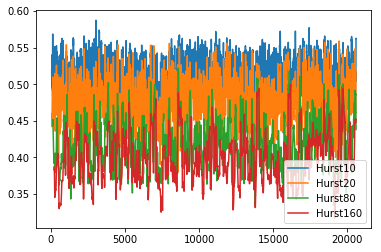

In [64]:
plt.plot(ativo_pivot['Hurst10'].rolling(20).mean())
plt.plot(ativo_pivot['Hurst20'].rolling(20).mean())
plt.plot(ativo_pivot['Hurst80'].rolling(20).mean())
plt.plot(ativo_pivot['Hurst160'].rolling(20).mean())
plt.legend()

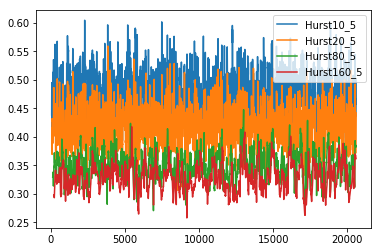

In [65]:
plt.plot(ativo_pivot['Hurst10_5'].rolling(20).mean())
plt.plot(ativo_pivot['Hurst20_5'].rolling(20).mean())
plt.plot(ativo_pivot['Hurst80_5'].rolling(20).mean())
plt.plot(ativo_pivot['Hurst160_5'].rolling(20).mean())
plt.legend()

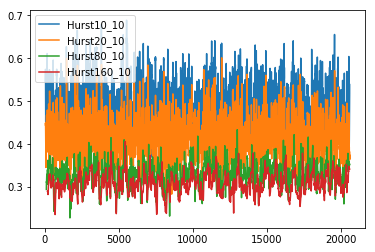

In [66]:
plt.plot(ativo_pivot['Hurst10_10'].rolling(20).mean())
plt.plot(ativo_pivot['Hurst20_10'].rolling(20).mean())
plt.plot(ativo_pivot['Hurst80_10'].rolling(20).mean())
plt.plot(ativo_pivot['Hurst160_10'].rolling(20).mean())
plt.legend()

In [67]:
ativo_pivot['m20_OBV_ret3']  = ativo_pivot['OBV_ret3'].rolling(20).mean()
ativo_pivot['dp20_OBV_ret3'] = ativo_pivot['OBV_ret3'].rolling(20).std()
ativo_pivot['Ajuste20_OBV']     = ativo_pivot['OBV_ret3'] - ativo_pivot['m20_OBV_ret3']

ativo_pivot['MaxAjuste20_OBV']  = ativo_pivot['Ajuste20_OBV'].rolling(20).max()

ativo_pivot['MinAjuste20_OBV']  = ativo_pivot['Ajuste20_OBV'].rolling(20).min()

ativo_pivot['RS_OBV_20']   = (ativo_pivot['MaxAjuste20_OBV'] - ativo_pivot['MinAjuste20_OBV'])/ativo_pivot['dp20_OBV_ret3']

ativo_pivot['HURST_OBV20'] = np.log2(ativo_pivot['RS_OBV_20'])/np.log2(20)

#--------------------------------------------------------------------------------------

ativo_pivot['m80_OBV_ret3']  = ativo_pivot['OBV_ret3'].rolling(80).mean()
ativo_pivot['dp80_OBV_ret3'] = ativo_pivot['OBV_ret3'].rolling(80).std()
ativo_pivot['Ajuste80_OBV']     = ativo_pivot['OBV_ret3'] - ativo_pivot['m20_OBV_ret3']

ativo_pivot['MaxAjuste80_OBV']  = ativo_pivot['Ajuste80_OBV'].rolling(80).max()

ativo_pivot['MinAjuste80_OBV']  = ativo_pivot['Ajuste80_OBV'].rolling(80).min()

ativo_pivot['RS_OBV_80']   = (ativo_pivot['MaxAjuste80_OBV'] - ativo_pivot['MinAjuste80_OBV'])/ativo_pivot['dp80_OBV_ret3']

ativo_pivot['HURST_OBV80'] = np.log2(ativo_pivot['RS_OBV_80'])/np.log2(80)

#--------------------------------------------------------------------------------------

ativo_pivot['m160_OBV_ret3']  = ativo_pivot['OBV_ret3'].rolling(160).mean()
ativo_pivot['dp160_OBV_ret3'] = ativo_pivot['OBV_ret3'].rolling(160).std()
ativo_pivot['Ajuste160_OBV']     = ativo_pivot['OBV_ret3'] - ativo_pivot['m20_OBV_ret3']

ativo_pivot['MaxAjuste160_OBV']  = ativo_pivot['Ajuste160_OBV'].rolling(160).max()

ativo_pivot['MinAjuste160_OBV']  = ativo_pivot['Ajuste160_OBV'].rolling(160).min()

ativo_pivot['RS_OBV_160']   = (ativo_pivot['MaxAjuste160_OBV'] - ativo_pivot['MinAjuste160_OBV'])/ativo_pivot['dp160_OBV_ret3']

ativo_pivot['HURST_OBV160'] = np.log2(ativo_pivot['RS_OBV_160'])/np.log2(160)

#--------------------------------------------------------------------------------------

ativo_pivot['m10_OBV_ret3']  = ativo_pivot['OBV_ret3'].rolling(10).mean()
ativo_pivot['dp10_OBV_ret3'] = ativo_pivot['OBV_ret3'].rolling(10).std()
ativo_pivot['Ajuste10_OBV']     = ativo_pivot['OBV_ret3'] - ativo_pivot['m20_OBV_ret3']

ativo_pivot['MaxAjuste10_OBV']  = ativo_pivot['Ajuste10_OBV'].rolling(10).max()

ativo_pivot['MinAjuste10_OBV']  = ativo_pivot['Ajuste10_OBV'].rolling(10).min()

ativo_pivot['RS_OBV_10']   = (ativo_pivot['MaxAjuste10_OBV'] - ativo_pivot['MinAjuste10_OBV'])/ativo_pivot['dp10_OBV_ret3']

ativo_pivot['HURST_OBV10'] = np.log2(ativo_pivot['RS_OBV_10'])/np.log2(10)

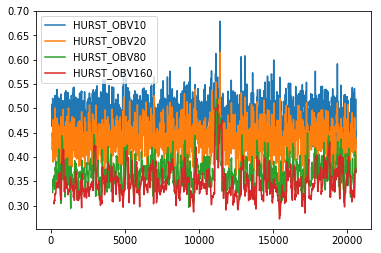

In [68]:
plt.plot(ativo_pivot['HURST_OBV10'].rolling(20).mean())
plt.plot(ativo_pivot['HURST_OBV20'].rolling(20).mean())
plt.plot(ativo_pivot['HURST_OBV80'].rolling(20).mean())
plt.plot(ativo_pivot['HURST_OBV160'].rolling(20).mean())
plt.legend()

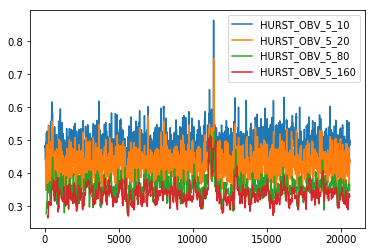

In [69]:
ativo_pivot['m20_OBV_5__ret5']  = ativo_pivot['OBV_ret5'].rolling(20).mean()
ativo_pivot['dp20_OBV_5__ret5'] = ativo_pivot['OBV_ret5'].rolling(20).std()
ativo_pivot['Ajuste20_OBV_5_']     = ativo_pivot['OBV_ret5'] - ativo_pivot['m20_OBV_5__ret5']

ativo_pivot['MaxAjuste20_OBV_5_']  = ativo_pivot['Ajuste20_OBV_5_'].rolling(20).max()

ativo_pivot['MinAjuste20_OBV_5_']  = ativo_pivot['Ajuste20_OBV_5_'].rolling(20).min()

ativo_pivot['RS_OBV_5__20']   = (ativo_pivot['MaxAjuste20_OBV_5_'] - ativo_pivot['MinAjuste20_OBV_5_'])/ativo_pivot['dp20_OBV_5__ret5']

ativo_pivot['HURST_OBV_5_20'] = np.log2(ativo_pivot['RS_OBV_5__20'])/np.log2(20)

#--------------------------------------------------------------------------------------

ativo_pivot['m80_OBV_5__ret5']  = ativo_pivot['OBV_ret5'].rolling(80).mean()
ativo_pivot['dp80_OBV_5__ret5'] = ativo_pivot['OBV_ret5'].rolling(80).std()
ativo_pivot['Ajuste80_OBV_5_']     = ativo_pivot['OBV_ret5'] - ativo_pivot['m20_OBV_5__ret5']

ativo_pivot['MaxAjuste80_OBV_5_']  = ativo_pivot['Ajuste80_OBV_5_'].rolling(80).max()

ativo_pivot['MinAjuste80_OBV_5_']  = ativo_pivot['Ajuste80_OBV_5_'].rolling(80).min()

ativo_pivot['RS_OBV_5__80']   = (ativo_pivot['MaxAjuste80_OBV_5_'] - ativo_pivot['MinAjuste80_OBV_5_'])/ativo_pivot['dp80_OBV_5__ret5']

ativo_pivot['HURST_OBV_5_80'] = np.log2(ativo_pivot['RS_OBV_5__80'])/np.log2(80)

#--------------------------------------------------------------------------------------

ativo_pivot['m160_OBV_5__ret5']  = ativo_pivot['OBV_ret5'].rolling(160).mean()
ativo_pivot['dp160_OBV_5__ret5'] = ativo_pivot['OBV_ret5'].rolling(160).std()
ativo_pivot['Ajuste160_OBV_5_']     = ativo_pivot['OBV_ret5'] - ativo_pivot['m20_OBV_5__ret5']

ativo_pivot['MaxAjuste160_OBV_5_']  = ativo_pivot['Ajuste160_OBV_5_'].rolling(160).max()

ativo_pivot['MinAjuste160_OBV_5_']  = ativo_pivot['Ajuste160_OBV_5_'].rolling(160).min()

ativo_pivot['RS_OBV_5__160']   = (ativo_pivot['MaxAjuste160_OBV_5_'] - ativo_pivot['MinAjuste160_OBV_5_'])/ativo_pivot['dp160_OBV_5__ret5']

ativo_pivot['HURST_OBV_5_160'] = np.log2(ativo_pivot['RS_OBV_5__160'])/np.log2(160)

#--------------------------------------------------------------------------------------

ativo_pivot['m10_OBV_5__ret5']  = ativo_pivot['OBV_ret5'].rolling(10).mean()
ativo_pivot['dp10_OBV_5__ret5'] = ativo_pivot['OBV_ret5'].rolling(10).std()
ativo_pivot['Ajuste10_OBV_5_']     = ativo_pivot['OBV_ret5'] - ativo_pivot['m20_OBV_5__ret5']

ativo_pivot['MaxAjuste10_OBV_5_']  = ativo_pivot['Ajuste10_OBV_5_'].rolling(10).max()

ativo_pivot['MinAjuste10_OBV_5_']  = ativo_pivot['Ajuste10_OBV_5_'].rolling(10).min()

ativo_pivot['RS_OBV_5__10']   = (ativo_pivot['MaxAjuste10_OBV_5_'] - ativo_pivot['MinAjuste10_OBV_5_'])/ativo_pivot['dp10_OBV_5__ret5']

ativo_pivot['HURST_OBV_5_10'] = np.log2(ativo_pivot['RS_OBV_5__10'])/np.log2(10)

plt.plot(ativo_pivot['HURST_OBV_5_10'].rolling(20).mean())
plt.plot(ativo_pivot['HURST_OBV_5_20'].rolling(20).mean())
plt.plot(ativo_pivot['HURST_OBV_5_80'].rolling(20).mean())
plt.plot(ativo_pivot['HURST_OBV_5_160'].rolling(20).mean())
plt.legend()

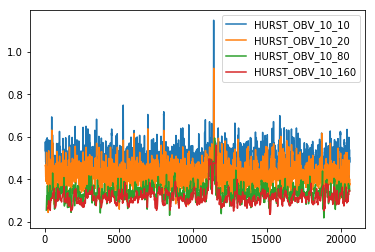

In [70]:
ativo_pivot['m20_OBV_10__ret5']  = ativo_pivot['OBV_ret10'].rolling(20).mean()
ativo_pivot['dp20_OBV_10__ret5'] = ativo_pivot['OBV_ret10'].rolling(20).std()
ativo_pivot['Ajuste20_OBV_10_']     = ativo_pivot['OBV_ret10'] - ativo_pivot['m20_OBV_10__ret5']

ativo_pivot['MaxAjuste20_OBV_10_']  = ativo_pivot['Ajuste20_OBV_10_'].rolling(20).max()

ativo_pivot['MinAjuste20_OBV_10_']  = ativo_pivot['Ajuste20_OBV_10_'].rolling(20).min()

ativo_pivot['RS_OBV_10__20']   = (ativo_pivot['MaxAjuste20_OBV_10_'] - ativo_pivot['MinAjuste20_OBV_10_'])/ativo_pivot['dp20_OBV_10__ret5']

ativo_pivot['HURST_OBV_10_20'] = np.log2(ativo_pivot['RS_OBV_10__20'])/np.log2(20)

#--------------------------------------------------------------------------------------

ativo_pivot['m80_OBV_10__ret5']  = ativo_pivot['OBV_ret10'].rolling(80).mean()
ativo_pivot['dp80_OBV_10__ret5'] = ativo_pivot['OBV_ret10'].rolling(80).std()
ativo_pivot['Ajuste80_OBV_10_']     = ativo_pivot['OBV_ret10'] - ativo_pivot['m20_OBV_10__ret5']

ativo_pivot['MaxAjuste80_OBV_10_']  = ativo_pivot['Ajuste80_OBV_10_'].rolling(80).max()

ativo_pivot['MinAjuste80_OBV_10_']  = ativo_pivot['Ajuste80_OBV_10_'].rolling(80).min()

ativo_pivot['RS_OBV_10__80']   = (ativo_pivot['MaxAjuste80_OBV_10_'] - ativo_pivot['MinAjuste80_OBV_10_'])/ativo_pivot['dp80_OBV_10__ret5']

ativo_pivot['HURST_OBV_10_80'] = np.log2(ativo_pivot['RS_OBV_10__80'])/np.log2(80)

#--------------------------------------------------------------------------------------

ativo_pivot['m160_OBV_10__ret5']  = ativo_pivot['OBV_ret10'].rolling(160).mean()
ativo_pivot['dp160_OBV_10__ret5'] = ativo_pivot['OBV_ret10'].rolling(160).std()
ativo_pivot['Ajuste160_OBV_10_']     = ativo_pivot['OBV_ret10'] - ativo_pivot['m20_OBV_10__ret5']

ativo_pivot['MaxAjuste160_OBV_10_']  = ativo_pivot['Ajuste160_OBV_10_'].rolling(160).max()

ativo_pivot['MinAjuste160_OBV_10_']  = ativo_pivot['Ajuste160_OBV_10_'].rolling(160).min()

ativo_pivot['RS_OBV_10__160']   = (ativo_pivot['MaxAjuste160_OBV_10_'] - ativo_pivot['MinAjuste160_OBV_10_'])/ativo_pivot['dp160_OBV_10__ret5']

ativo_pivot['HURST_OBV_10_160'] = np.log2(ativo_pivot['RS_OBV_10__160'])/np.log2(160)

#--------------------------------------------------------------------------------------

ativo_pivot['m10_OBV_10__ret5']  = ativo_pivot['OBV_ret10'].rolling(10).mean()
ativo_pivot['dp10_OBV_10__ret5'] = ativo_pivot['OBV_ret10'].rolling(10).std()
ativo_pivot['Ajuste10_OBV_10_']     = ativo_pivot['OBV_ret10'] - ativo_pivot['m20_OBV_10__ret5']

ativo_pivot['MaxAjuste10_OBV_10_']  = ativo_pivot['Ajuste10_OBV_10_'].rolling(10).max()

ativo_pivot['MinAjuste10_OBV_10_']  = ativo_pivot['Ajuste10_OBV_10_'].rolling(10).min()

ativo_pivot['RS_OBV_10__10']   = (ativo_pivot['MaxAjuste10_OBV_10_'] - ativo_pivot['MinAjuste10_OBV_10_'])/ativo_pivot['dp10_OBV_10__ret5']

ativo_pivot['HURST_OBV_10_10'] = np.log2(ativo_pivot['RS_OBV_10__10'])/np.log2(10)

plt.plot(ativo_pivot['HURST_OBV_10_10'].rolling(20).mean())
plt.plot(ativo_pivot['HURST_OBV_10_20'].rolling(20).mean())
plt.plot(ativo_pivot['HURST_OBV_10_80'].rolling(20).mean())
plt.plot(ativo_pivot['HURST_OBV_10_160'].rolling(20).mean())
plt.legend()

In [71]:
ativo_pivot = ativo_pivot.dropna()

In [72]:
ativo_pivot.shape

(20412, 468)

In [73]:
ativo_pivot.tail()

,Date,Open,High,Low,Close,Tick,Volume,Hora,DiaMesAno,PivotPoint,...,MinAjuste160_OBV_10_,RS_OBV_10__160,HURST_OBV_10_160,m10_OBV_10__ret5,dp10_OBV_10__ret5,Ajuste10_OBV_10_,MaxAjuste10_OBV_10_,MinAjuste10_OBV_10_,RS_OBV_10__10,HURST_OBV_10_10
20585,2020.08.20 16:00,22.69,22.86,22.65,22.75,13772,6208700,16,20-8-2020,22.976667,...,-0.03257,5.672255,0.341976,-0.012548,0.003684,-0.003849,-0.003849,-0.019094,4.138356,0.616828
20586,2020.08.20 17:00,22.73,22.78,22.64,22.70,924,2294100,17,20-8-2020,22.976667,...,-0.03257,5.699923,0.342935,-0.011660,0.004381,-0.000764,-0.000764,-0.019094,4.183978,0.621589
20587,2020.08.21 10:00,22.54,22.63,22.40,22.45,11225,10896600,10,21-8-2020,22.640000,...,-0.03257,5.716797,0.343517,-0.010941,0.004370,-0.002604,-0.000764,-0.019094,4.194379,0.622668
20588,2020.08.21 11:00,22.47,22.60,22.37,22.56,9744,9305500,11,21-8-2020,22.640000,...,-0.03257,5.724520,0.343783,-0.009615,0.005027,0.004512,0.004512,-0.019094,4.695785,0.671708
20589,2020.08.21 12:00,22.57,22.58,22.40,22.42,5980,4596200,12,21-8-2020,22.640000,...,-0.03257,5.743168,0.344424,-0.007360,0.005263,0.010021,0.010021,-0.014206,4.603442,0.663083


In [74]:
ativo_pivot['Sinal'] = np.where((ativo_pivot['Hora'] ==  segunda_hora)&
                               (ativo_pivot['Open'] < ativo_pivot['PivotPoint']) &
                                (ativo_pivot['Open'].shift() < ativo_pivot['PivotPoint']) &
                                (ativo_pivot['High'].shift() < ativo_pivot['PivotPoint']),1,0
                               )

In [75]:
sum(ativo_pivot['Sinal'])

588

In [76]:
ativo_pivot.head()

,Date,Open,High,Low,Close,Tick,Volume,Hora,DiaMesAno,PivotPoint,...,RS_OBV_10__160,HURST_OBV_10_160,m10_OBV_10__ret5,dp10_OBV_10__ret5,Ajuste10_OBV_10_,MaxAjuste10_OBV_10_,MinAjuste10_OBV_10_,RS_OBV_10__10,HURST_OBV_10_10,Sinal
178,2010.11.30 13:00,20.92,21.03,20.90,20.95,1992,2018400,13,30-11-2010,21.03,...,3.556301,0.249986,0.012837,0.008285,0.021945,0.027461,0.006217,2.564109,0.408937,0
179,2010.11.30 14:00,20.94,21.17,20.92,21.17,2931,3602600,14,30-11-2010,21.03,...,3.557180,0.250034,0.014465,0.008526,0.020463,0.027461,0.006217,2.491774,0.396509,0
180,2010.11.30 15:00,21.17,21.31,21.10,21.27,3164,3583600,15,30-11-2010,21.03,...,3.583112,0.251466,0.015702,0.009781,0.024462,0.027461,0.006217,2.171977,0.336855,0
181,2010.11.30 16:00,21.27,21.35,21.24,21.29,2786,2968200,16,30-11-2010,21.03,...,3.624332,0.253719,0.017132,0.011180,0.024870,0.027461,0.006217,1.900148,0.278787,0
182,2010.11.30 17:00,21.29,21.34,21.05,21.05,3368,3149700,17,30-11-2010,21.03,...,3.660178,0.255659,0.020143,0.010322,0.020909,0.027461,0.006217,2.058115,0.313470,0


In [77]:
dias_ = ativo_pivot['DiaMesAno'].values.ravel()

dias_ = np.unique(dias_)

In [78]:
compilado = []
for i in range(len(dias_)):
    dia_atual = dias_[i]
    ativo_dia = ativo_pivot[ativo_pivot['DiaMesAno'] == dia_atual]
    ativo_dia = ativo_dia.reset_index().iloc[:,1:]
    
    percentual         = []
    financeiro         = []
    minimo_dia         = []
    maxima_dia         = []
    fechamenato_diario = []
    
    for k in range(len(ativo_dia)):
        abertura_atual = ativo_dia['Open'][k:k+1].values.ravel()[0]
        fechamento_dia = ativo_dia['Close'][len(ativo_dia) - 1:len(ativo_dia)].values.ravel()[0]
        min_dia        = min(ativo_dia['Low'])
        max_dia        = max(ativo_dia['High'])
        
        percentual.append(((fechamento_dia/abertura_atual)-1) * 100)
        financeiro.append(fechamento_dia-abertura_atual)
        minimo_dia.append(min_dia)
        maxima_dia.append(max_dia)
        fechamenato_diario.append(fechamento_dia)
    
    ativo_dia['GanhoFinanceiro'] = financeiro
    ativo_dia['GanhoPercentual'] = percentual
    ativo_dia['MinDia']          = minimo_dia
    ativo_dia['MaxDia']          = maxima_dia
    ativo_dia['FechamentoDia']   = fechamenato_diario
    
    compilado.append(ativo_dia)
    print('Restam : ' + str(len(dias_) - (i+1)))

Restam : 2407
Restam : 2406
Restam : 2405
Restam : 2404
Restam : 2403
Restam : 2402
Restam : 2401
Restam : 2400
Restam : 2399
Restam : 2398
Restam : 2397
Restam : 2396
Restam : 2395
Restam : 2394
Restam : 2393
Restam : 2392
Restam : 2391
Restam : 2390
Restam : 2389
Restam : 2388
Restam : 2387
Restam : 2386
Restam : 2385
Restam : 2384
Restam : 2383
Restam : 2382
Restam : 2381
Restam : 2380
Restam : 2379
Restam : 2378
Restam : 2377
Restam : 2376
Restam : 2375
Restam : 2374
Restam : 2373
Restam : 2372
Restam : 2371
Restam : 2370
Restam : 2369
Restam : 2368
Restam : 2367
Restam : 2366
Restam : 2365
Restam : 2364
Restam : 2363
Restam : 2362
Restam : 2361
Restam : 2360
Restam : 2359
Restam : 2358
Restam : 2357
Restam : 2356
Restam : 2355
Restam : 2354
Restam : 2353
Restam : 2352
Restam : 2351
Restam : 2350
Restam : 2349
Restam : 2348
Restam : 2347
Restam : 2346
Restam : 2345
Restam : 2344
Restam : 2343
Restam : 2342
Restam : 2341
Restam : 2340
Restam : 2339
Restam : 2338
Restam : 2337
Restam

Restam : 1809
Restam : 1808
Restam : 1807
Restam : 1806
Restam : 1805
Restam : 1804
Restam : 1803
Restam : 1802
Restam : 1801
Restam : 1800
Restam : 1799
Restam : 1798
Restam : 1797
Restam : 1796
Restam : 1795
Restam : 1794
Restam : 1793
Restam : 1792
Restam : 1791
Restam : 1790
Restam : 1789
Restam : 1788
Restam : 1787
Restam : 1786
Restam : 1785
Restam : 1784
Restam : 1783
Restam : 1782
Restam : 1781
Restam : 1780
Restam : 1779
Restam : 1778
Restam : 1777
Restam : 1776
Restam : 1775
Restam : 1774
Restam : 1773
Restam : 1772
Restam : 1771
Restam : 1770
Restam : 1769
Restam : 1768
Restam : 1767
Restam : 1766
Restam : 1765
Restam : 1764
Restam : 1763
Restam : 1762
Restam : 1761
Restam : 1760
Restam : 1759
Restam : 1758
Restam : 1757
Restam : 1756
Restam : 1755
Restam : 1754
Restam : 1753
Restam : 1752
Restam : 1751
Restam : 1750
Restam : 1749
Restam : 1748
Restam : 1747
Restam : 1746
Restam : 1745
Restam : 1744
Restam : 1743
Restam : 1742
Restam : 1741
Restam : 1740
Restam : 1739
Restam

Restam : 1222
Restam : 1221
Restam : 1220
Restam : 1219
Restam : 1218
Restam : 1217
Restam : 1216
Restam : 1215
Restam : 1214
Restam : 1213
Restam : 1212
Restam : 1211
Restam : 1210
Restam : 1209
Restam : 1208
Restam : 1207
Restam : 1206
Restam : 1205
Restam : 1204
Restam : 1203
Restam : 1202
Restam : 1201
Restam : 1200
Restam : 1199
Restam : 1198
Restam : 1197
Restam : 1196
Restam : 1195
Restam : 1194
Restam : 1193
Restam : 1192
Restam : 1191
Restam : 1190
Restam : 1189
Restam : 1188
Restam : 1187
Restam : 1186
Restam : 1185
Restam : 1184
Restam : 1183
Restam : 1182
Restam : 1181
Restam : 1180
Restam : 1179
Restam : 1178
Restam : 1177
Restam : 1176
Restam : 1175
Restam : 1174
Restam : 1173
Restam : 1172
Restam : 1171
Restam : 1170
Restam : 1169
Restam : 1168
Restam : 1167
Restam : 1166
Restam : 1165
Restam : 1164
Restam : 1163
Restam : 1162
Restam : 1161
Restam : 1160
Restam : 1159
Restam : 1158
Restam : 1157
Restam : 1156
Restam : 1155
Restam : 1154
Restam : 1153
Restam : 1152
Restam

Restam : 596
Restam : 595
Restam : 594
Restam : 593
Restam : 592
Restam : 591
Restam : 590
Restam : 589
Restam : 588
Restam : 587
Restam : 586
Restam : 585
Restam : 584
Restam : 583
Restam : 582
Restam : 581
Restam : 580
Restam : 579
Restam : 578
Restam : 577
Restam : 576
Restam : 575
Restam : 574
Restam : 573
Restam : 572
Restam : 571
Restam : 570
Restam : 569
Restam : 568
Restam : 567
Restam : 566
Restam : 565
Restam : 564
Restam : 563
Restam : 562
Restam : 561
Restam : 560
Restam : 559
Restam : 558
Restam : 557
Restam : 556
Restam : 555
Restam : 554
Restam : 553
Restam : 552
Restam : 551
Restam : 550
Restam : 549
Restam : 548
Restam : 547
Restam : 546
Restam : 545
Restam : 544
Restam : 543
Restam : 542
Restam : 541
Restam : 540
Restam : 539
Restam : 538
Restam : 537
Restam : 536
Restam : 535
Restam : 534
Restam : 533
Restam : 532
Restam : 531
Restam : 530
Restam : 529
Restam : 528
Restam : 527
Restam : 526
Restam : 525
Restam : 524
Restam : 523
Restam : 522
Restam : 521
Restam : 520

In [79]:
ativo_final = compilado[0]

for i in range(1, len(compilado)):
    ativo_final = pd.concat((ativo_final, compilado[i]), axis = 0)
    print('Restam : ' + str(len(compilado) - (i+1)))


Restam : 2406
Restam : 2405
Restam : 2404
Restam : 2403
Restam : 2402
Restam : 2401
Restam : 2400
Restam : 2399
Restam : 2398
Restam : 2397
Restam : 2396
Restam : 2395
Restam : 2394
Restam : 2393
Restam : 2392
Restam : 2391
Restam : 2390
Restam : 2389
Restam : 2388
Restam : 2387
Restam : 2386
Restam : 2385
Restam : 2384
Restam : 2383
Restam : 2382
Restam : 2381
Restam : 2380
Restam : 2379
Restam : 2378
Restam : 2377
Restam : 2376
Restam : 2375
Restam : 2374
Restam : 2373
Restam : 2372
Restam : 2371
Restam : 2370
Restam : 2369
Restam : 2368
Restam : 2367
Restam : 2366
Restam : 2365
Restam : 2364
Restam : 2363
Restam : 2362
Restam : 2361
Restam : 2360
Restam : 2359
Restam : 2358
Restam : 2357
Restam : 2356
Restam : 2355
Restam : 2354
Restam : 2353
Restam : 2352
Restam : 2351
Restam : 2350
Restam : 2349
Restam : 2348
Restam : 2347
Restam : 2346
Restam : 2345
Restam : 2344
Restam : 2343
Restam : 2342
Restam : 2341
Restam : 2340
Restam : 2339
Restam : 2338
Restam : 2337
Restam : 2336
Restam

Restam : 1820
Restam : 1819
Restam : 1818
Restam : 1817
Restam : 1816
Restam : 1815
Restam : 1814
Restam : 1813
Restam : 1812
Restam : 1811
Restam : 1810
Restam : 1809
Restam : 1808
Restam : 1807
Restam : 1806
Restam : 1805
Restam : 1804
Restam : 1803
Restam : 1802
Restam : 1801
Restam : 1800
Restam : 1799
Restam : 1798
Restam : 1797
Restam : 1796
Restam : 1795
Restam : 1794
Restam : 1793
Restam : 1792
Restam : 1791
Restam : 1790
Restam : 1789
Restam : 1788
Restam : 1787
Restam : 1786
Restam : 1785
Restam : 1784
Restam : 1783
Restam : 1782
Restam : 1781
Restam : 1780
Restam : 1779
Restam : 1778
Restam : 1777
Restam : 1776
Restam : 1775
Restam : 1774
Restam : 1773
Restam : 1772
Restam : 1771
Restam : 1770
Restam : 1769
Restam : 1768
Restam : 1767
Restam : 1766
Restam : 1765
Restam : 1764
Restam : 1763
Restam : 1762
Restam : 1761
Restam : 1760
Restam : 1759
Restam : 1758
Restam : 1757
Restam : 1756
Restam : 1755
Restam : 1754
Restam : 1753
Restam : 1752
Restam : 1751
Restam : 1750
Restam

Restam : 1234
Restam : 1233
Restam : 1232
Restam : 1231
Restam : 1230
Restam : 1229
Restam : 1228
Restam : 1227
Restam : 1226
Restam : 1225
Restam : 1224
Restam : 1223
Restam : 1222
Restam : 1221
Restam : 1220
Restam : 1219
Restam : 1218
Restam : 1217
Restam : 1216
Restam : 1215
Restam : 1214
Restam : 1213
Restam : 1212
Restam : 1211
Restam : 1210
Restam : 1209
Restam : 1208
Restam : 1207
Restam : 1206
Restam : 1205
Restam : 1204
Restam : 1203
Restam : 1202
Restam : 1201
Restam : 1200
Restam : 1199
Restam : 1198
Restam : 1197
Restam : 1196
Restam : 1195
Restam : 1194
Restam : 1193
Restam : 1192
Restam : 1191
Restam : 1190
Restam : 1189
Restam : 1188
Restam : 1187
Restam : 1186
Restam : 1185
Restam : 1184
Restam : 1183
Restam : 1182
Restam : 1181
Restam : 1180
Restam : 1179
Restam : 1178
Restam : 1177
Restam : 1176
Restam : 1175
Restam : 1174
Restam : 1173
Restam : 1172
Restam : 1171
Restam : 1170
Restam : 1169
Restam : 1168
Restam : 1167
Restam : 1166
Restam : 1165
Restam : 1164
Restam

Restam : 621
Restam : 620
Restam : 619
Restam : 618
Restam : 617
Restam : 616
Restam : 615
Restam : 614
Restam : 613
Restam : 612
Restam : 611
Restam : 610
Restam : 609
Restam : 608
Restam : 607
Restam : 606
Restam : 605
Restam : 604
Restam : 603
Restam : 602
Restam : 601
Restam : 600
Restam : 599
Restam : 598
Restam : 597
Restam : 596
Restam : 595
Restam : 594
Restam : 593
Restam : 592
Restam : 591
Restam : 590
Restam : 589
Restam : 588
Restam : 587
Restam : 586
Restam : 585
Restam : 584
Restam : 583
Restam : 582
Restam : 581
Restam : 580
Restam : 579
Restam : 578
Restam : 577
Restam : 576
Restam : 575
Restam : 574
Restam : 573
Restam : 572
Restam : 571
Restam : 570
Restam : 569
Restam : 568
Restam : 567
Restam : 566
Restam : 565
Restam : 564
Restam : 563
Restam : 562
Restam : 561
Restam : 560
Restam : 559
Restam : 558
Restam : 557
Restam : 556
Restam : 555
Restam : 554
Restam : 553
Restam : 552
Restam : 551
Restam : 550
Restam : 549
Restam : 548
Restam : 547
Restam : 546
Restam : 545

In [80]:
ativo_final.head(10)

,Date,Open,High,Low,Close,Tick,Volume,Hora,DiaMesAno,PivotPoint,...,MaxAjuste10_OBV_10_,MinAjuste10_OBV_10_,RS_OBV_10__10,HURST_OBV_10_10,Sinal,GanhoFinanceiro,GanhoPercentual,MinDia,MaxDia,FechamentoDia
0,2012.10.01 10:00,20.17,20.55,20.15,20.46,3805,3933800,10,1-10-2012,20.250000,...,-0.001606,-0.019127,2.702528,0.431770,0,0.16,0.793257,20.15,20.63,20.33
1,2012.10.01 11:00,20.47,20.63,20.45,20.50,3204,2901400,11,1-10-2012,20.250000,...,0.008577,-0.019127,3.357976,0.526078,0,-0.14,-0.683928,20.15,20.63,20.33
2,2012.10.01 12:00,20.50,20.53,20.45,20.47,2737,1395600,12,1-10-2012,20.250000,...,0.011857,-0.019127,3.224975,0.508526,0,-0.17,-0.829268,20.15,20.63,20.33
3,2012.10.01 13:00,20.47,20.54,20.39,20.47,2634,1201000,13,1-10-2012,20.250000,...,0.015776,-0.019127,3.265307,0.513924,0,-0.14,-0.683928,20.15,20.63,20.33
4,2012.10.01 14:00,20.47,20.52,20.39,20.49,2560,1198300,14,1-10-2012,20.250000,...,0.015791,-0.019127,2.933496,0.467386,0,-0.14,-0.683928,20.15,20.63,20.33
5,2012.10.01 15:00,20.49,20.56,20.47,20.55,2175,871700,15,1-10-2012,20.250000,...,0.015791,-0.019127,2.770024,0.442484,0,-0.16,-0.780869,20.15,20.63,20.33
6,2012.10.01 16:00,20.55,20.56,20.30,20.35,4814,2624500,16,1-10-2012,20.250000,...,0.015791,-0.019127,2.740366,0.437808,0,-0.22,-1.070560,20.15,20.63,20.33
7,2012.10.01 17:00,20.34,20.37,20.34,20.35,144,1430200,17,1-10-2012,20.250000,...,0.016129,-0.019127,2.692561,0.430166,0,-0.01,-0.049164,20.15,20.63,20.33
8,2012.10.01 18:00,20.36,20.37,20.33,20.33,30,19700,18,1-10-2012,20.250000,...,0.024737,-0.012654,3.271436,0.514738,0,-0.03,-0.147348,20.15,20.63,20.33
0,2013.10.01 10:00,17.35,17.47,17.20,17.41,3500,3289800,10,1-10-2013,17.433333,...,0.023946,-0.006481,3.613810,0.557965,0,0.12,0.691643,17.20,17.50,17.47


In [81]:
ativo_final = ativo_final.reset_index().iloc[:,1:]

In [82]:
ativo_final['PercentualSetupBruto'] = ativo_final['Sinal'] * ativo_final['GanhoPercentual']
ativo_final['FinanceiroSetupBruto'] = ativo_final['Sinal'] * ativo_final['GanhoFinanceiro']

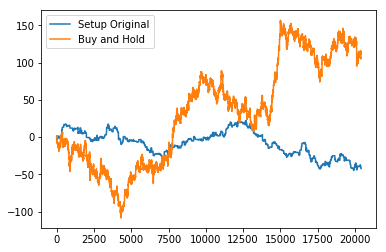

In [83]:
plt.plot(ativo_final['PercentualSetupBruto'].cumsum())
plt.plot(ativo_final['Retorno'].cumsum() * 100)
plt.legend(['Setup Original', 'Buy and Hold'])
plt.show()

In [84]:
tx_acerto = len(ativo_final[ativo_final['PercentualSetupBruto'] > 0])/len(ativo_final[ativo_final['PercentualSetupBruto'] != 0])

sharpe_estrategia_original = ativo_final['PercentualSetupBruto'][ativo_final['PercentualSetupBruto'] != 0].mean()/ativo_final['PercentualSetupBruto'][ativo_final['PercentualSetupBruto'] != 0].std()
sharpe_buy_and_hold        = ativo_final['Retorno'].mean()/ativo_final['Retorno'].std()

print('Taxa de acerto : ' + str(100 * tx_acerto))
print('Sharpe Estrategia Original : ' + str(100 * sharpe_estrategia_original))
print('Sharpe Buy and Hold : ' + str(100 * sharpe_buy_and_hold))

Taxa de acerto : 46.65523156089194
Sharpe Estrategia Original : -3.1999669594315607
Sharpe Buy and Hold : 0.5295317124846456


In [85]:
operacoes_realizadas = ativo_final[ativo_final['Sinal'] == 1].reset_index().iloc[:,1:]

len(operacoes_realizadas)

588

In [86]:
corte_balanceamento = int(len(operacoes_realizadas) * 0.4)

In [87]:
corte_balanceamento

235

In [88]:
piores   = operacoes_realizadas.sort_values('PercentualSetupBruto').reset_index().iloc[:,1:][:corte_balanceamento]

melhores = operacoes_realizadas.sort_values('PercentualSetupBruto', ascending = False).reset_index().iloc[:,1:][:corte_balanceamento]

In [89]:
piores.head()

,Date,Open,High,Low,Close,Tick,Volume,Hora,DiaMesAno,PivotPoint,...,RS_OBV_10__10,HURST_OBV_10_10,Sinal,GanhoFinanceiro,GanhoPercentual,MinDia,MaxDia,FechamentoDia,PercentualSetupBruto,FinanceiroSetupBruto
0,2014.12.15 11:00,9.94,10.00,9.90,9.96,5232,7081000,11,15-12-2014,10.290000,...,2.805114,0.447951,1,-0.91,-9.154930,8.98,10.25,9.03,-9.154930,-0.91
1,2016.11.11 11:00,15.19,15.41,14.85,14.98,17450,17704900,11,11-11-2016,16.003333,...,3.072322,0.487467,1,-1.23,-8.097433,13.89,15.41,13.96,-8.097433,-1.23
2,2018.05.28 11:00,18.29,18.33,18.01,18.01,15726,17456100,11,28-5-2018,20.326667,...,2.693648,0.430341,1,-1.46,-7.982504,16.80,19.20,16.83,-7.982504,-1.46
3,2016.04.04 11:00,8.13,8.13,8.02,8.05,3270,5257500,11,4-4-2016,8.210000,...,3.250850,0.511997,1,-0.64,-7.872079,7.48,8.15,7.49,-7.872079,-0.64
4,2016.02.02 11:00,4.61,4.61,4.54,4.55,1644,3254500,11,2-2-2016,4.726667,...,2.521133,0.401596,1,-0.33,-7.158351,4.28,4.63,4.28,-7.158351,-0.33


In [90]:
back_test_balanceado = pd.concat((piores, melhores), axis = 0).reset_index().iloc[:,1:]

In [91]:
for i in range(len(back_test_balanceado.columns)):
    print(str(i) + ' - ;' + back_test_balanceado.columns[i])

0 - ;Date
1 - ;Open
2 - ;High
3 - ;Low
4 - ;Close
5 - ;Tick
6 - ;Volume
7 - ;Hora
8 - ;DiaMesAno
9 - ;PivotPoint
10 - ;R1
11 - ;S1
12 - ;R2
13 - ;S2
14 - ;Retorno
15 - ;Retorno5
16 - ;Retorno10
17 - ;m9
18 - ;m20
19 - ;std20
20 - ;m50
21 - ;m100
22 - ;m200
23 - ;m20Low
24 - ;m20High
25 - ;VolDir
26 - ;OBV
27 - ;OBV_ret3
28 - ;OBV_ret5
29 - ;OBV_ret10
30 - ;m9_OBV_ret3
31 - ;m9_OBV_ret5
32 - ;m9_OBV_ret10
33 - ;m20_OBV_ret3
34 - ;m20_OBV_ret5
35 - ;m20_OBV_ret10
36 - ;m50_OBV_ret3
37 - ;m50_OBV_ret5
38 - ;m50_OBV_ret10
39 - ;m100_OBV_ret3
40 - ;m100_OBV_ret5
41 - ;m100_OBV_ret10
42 - ;m200_OBV_ret3
43 - ;m200_OBV_ret5
44 - ;m200_OBV_ret10
45 - ;m9_OBV
46 - ;m20_OBV
47 - ;std20_OBV
48 - ;m50_OBV
49 - ;std50_OBV
50 - ;m100_OBV
51 - ;std100_OBV
52 - ;m200_OBV
53 - ;std200_OBV
54 - ;BS20_OBV
55 - ;BI20_OBV
56 - ;Bp20_OBV
57 - ;BS50_OBV
58 - ;BI50_OBV
59 - ;Bp50_OBV
60 - ;BS100_OBV
61 - ;BI100_OBV
62 - ;Bp100_OBV
63 - ;BS200_OBV
64 - ;BI200_OBV
65 - ;Bp200_OBV
66 - ;Bp20_OBV_ret3
67 - ;Bp20_

In [92]:
variaveis_otimizacao = [
'Date',
'PercentualSetupBruto',
'FinanceiroSetupBruto',
'Retorno',
'Retorno5',
'Retorno10',
'OBV_ret3',
'OBV_ret5',
'OBV_ret10',
'm9_OBV_ret3',
'm9_OBV_ret5',
'm9_OBV_ret10',
'm20_OBV_ret3',
'm20_OBV_ret5',
'm20_OBV_ret10',
'm50_OBV_ret3',
'm50_OBV_ret5',
'm50_OBV_ret10',
'm100_OBV_ret3',
'm100_OBV_ret5',
'm100_OBV_ret10',
'm200_OBV_ret3',
'm200_OBV_ret5',
'm200_OBV_ret10',
'Bp20_OBV',
'Bp50_OBV',
'Bp100_OBV',
'Bp200_OBV',
'Bp20_OBV_ret3',
'Bp20_OBV_ret5',
'Bp20_OBV_ret10',
'Bp50_OBV_ret3',
'Bp50_OBV_ret5',
'Bp50_OBV_ret10',
'Bp100_OBV_ret3',
'Bp100_OBV_ret5',
'Bp100_OBV_ret10',
'Bp200_OBV_ret3',
'Bp200_OBV_ret5',
'Bp200_OBV_ret10',
'Bp',
'Bp_m20',
'Bp_m50',
'Bp_m200',
'Bp_ret3',
'Bp_ret5',
'Bp_ret10',
'Bp_m20_ret3',
'Bp_m20_ret5',
'Bp_m20_ret10',
'Bp_m50_ret3',
'Bp_m50_ret5',
'Bp_m50_ret10',
'Bp_m200_ret3',
'Bp_m200_ret5',
'Bp_m200_ret10',
'GAP',
'GAP t-1',
'Open_Pivot',
'Open_R1',
'Open_R2',
'Open_S1',
'Open_S2',
'Corpo',
'Close_Medio',
'Open_Medio',
'Close_High',
'Close_Low',
'Close_Open',
'Open_High',
'Open_Low',
'Corpo t - 1',
'Corpo t - 2',
'Corpo t - 3',
'Corpo t - 4',
'Corpo t - 5',
'Corpo t - 6',
'Corpo t - 7',
'Corpo t - 8',
'Corpo t - 9',
'Corpo t - 10',
'Corpo t - 11',
'Corpo t - 12',
'Corpo t - 13',
'Corpo t - 14',
'Corpo t - 15',
'Corpo t - 16',
'Corpo t - 17',
'Corpo t - 18',
'Corpo t - 19',
'Close_Medio t - 1',
'Close_Medio t - 2',
'Close_Medio t - 3',
'Close_Medio t - 4',
'Close_Medio t - 5',
'Close_Medio t - 6',
'Close_Medio t - 7',
'Close_Medio t - 8',
'Close_Medio t - 9',
'Close_Medio t - 10',
'Close_Medio t - 11',
'Close_Medio t - 12',
'Close_Medio t - 13',
'Close_Medio t - 14',
'Close_Medio t - 15',
'Close_Medio t - 16',
'Close_Medio t - 17',
'Close_Medio t - 18',
'Close_Medio t - 19',
'Open_Medio t - 1',
'Open_Medio t - 2',
'Open_Medio t - 3',
'Open_Medio t - 4',
'Open_Medio t - 5',
'Open_Medio t - 6',
'Open_Medio t - 7',
'Open_Medio t - 8',
'Open_Medio t - 9',
'Open_Medio t - 10',
'Open_Medio t - 11',
'Open_Medio t - 12',
'Open_Medio t - 13',
'Open_Medio t - 14',
'Open_Medio t - 15',
'Open_Medio t - 16',
'Open_Medio t - 17',
'Open_Medio t - 18',
'Open_Medio t - 19',
'Close_High t - 1',
'Close_High t - 2',
'Close_High t - 3',
'Close_High t - 4',
'Close_High t - 5',
'Close_High t - 6',
'Close_High t - 7',
'Close_High t - 8',
'Close_High t - 9',
'Close_High t - 10',
'Close_High t - 11',
'Close_High t - 12',
'Close_High t - 13',
'Close_High t - 14',
'Close_High t - 15',
'Close_High t - 16',
'Close_High t - 17',
'Close_High t - 18',
'Close_High t - 19',
'Close_Low t - 1',
'Close_Low t - 2',
'Close_Low t - 3',
'Close_Low t - 4',
'Close_Low t - 5',
'Close_Low t - 6',
'Close_Low t - 7',
'Close_Low t - 8',
'Close_Low t - 9',
'Close_Low t - 10',
'Close_Low t - 11',
'Close_Low t - 12',
'Close_Low t - 13',
'Close_Low t - 14',
'Close_Low t - 15',
'Close_Low t - 16',
'Close_Low t - 17',
'Close_Low t - 18',
'Close_Low t - 19',
'Close_Open t - 1',
'Close_Open t - 2',
'Close_Open t - 3',
'Close_Open t - 4',
'Close_Open t - 5',
'Close_Open t - 6',
'Close_Open t - 7',
'Close_Open t - 8',
'Close_Open t - 9',
'Close_Open t - 10',
'Close_Open t - 11',
'Close_Open t - 12',
'Close_Open t - 13',
'Close_Open t - 14',
'Close_Open t - 15',
'Close_Open t - 16',
'Close_Open t - 17',
'Close_Open t - 18',
'Close_Open t - 19',
'Open_Low t - 1',
'Open_Low t - 2',
'Open_Low t - 3',
'Open_Low t - 4',
'Open_Low t - 5',
'Open_Low t - 6',
'Open_Low t - 7',
'Open_Low t - 8',
'Open_Low t - 9',
'Open_Low t - 10',
'Open_Low t - 11',
'Open_Low t - 12',
'Open_Low t - 13',
'Open_Low t - 14',
'Open_Low t - 15',
'Open_Low t - 16',
'Open_Low t - 17',
'Open_Low t - 18',
'Open_Low t - 19',
'GAP t - 1',
'GAP t - 2',
'GAP t - 3',
'GAP t - 4',
'GAP t - 5',
'GAP t - 6',
'GAP t - 7',
'GAP t - 8',
'GAP t - 9',
'GAP t - 10',
'GAP t - 11',
'GAP t - 12',
'GAP t - 13',
'GAP t - 14',
'GAP t - 15',
'GAP t - 16',
'GAP t - 17',
'GAP t - 18',
'GAP t - 19',
'm20_Volume',
'Volume_vs_m20',
'Volume_vs_m20 t -1',
'Volume_vs_m20 t -2',
'Volume_vs_m20 t -3',
'Volume_vs_m20 t -4',
'Volume_vs_m20 t -5',
'Volume_vs_m20 t -6',
'Volume_vs_m20 t -7',
'Volume_vs_m20 t -8',
'Volume_vs_m20 t -9',
'Volume_vs_m20 t -10',
'RetornoAbsoluto',
'RetornoAbsolutom100',
'VolatilidadeReal',
'Retorno VolatilidadeReal',
'VR Média 5',
'VR Média 5 t-1',
'VR Média 5 t-2',
'VR Média 5 t-3',
'VR Média 5 t-4',
'VR Média 5 t-5',
'Retorno VolatilidadeReal t-1',
'Retorno VolatilidadeReal t-2',
'Retorno VolatilidadeReal t-3',
'Retorno VolatilidadeReal t-4',
'Retorno VolatilidadeReal t-5',
'VolatilidadeReal t-1',
'VolatilidadeReal t-2',
'VolatilidadeReal t-3',
'VolatilidadeReal t-4',
'VolatilidadeReal t-5',
'GB_Liquidez',
'RF_Liquidez',
'LR_Liquidez',
'GB_Volatilidade',
'RF_Volatilidade',
'LR_Volatilidade',
'Hurst20',
'RS_80',
'Hurst160',
'Hurst10',
'Hurst20_5',
'Hurst80_5',
'RS_160_5',
'Hurst10_5',
'Hurst20_10',
'Hurst80_10',
'Hurst160_10',
'Hurst10_10',
'HURST_OBV20',
'HURST_OBV80',
'HURST_OBV160',
'HURST_OBV10',
'HURST_OBV_5_20',
'HURST_OBV_5_80',
'HURST_OBV_5_160',
'HURST_OBV_5_10',
'HURST_OBV_10_20',
'HURST_OBV_10_80',
'HURST_OBV_10_160',
'HURST_OBV_10_10'
]

In [93]:
dados_otimizacao = back_test_balanceado[variaveis_otimizacao[0]]

for i in range(1, len(variaveis_otimizacao)):
    dados_otimizacao = pd.concat((dados_otimizacao, 
                                  back_test_balanceado[variaveis_otimizacao[i]]), axis = 1)

In [94]:
dados_otimizacao.head()

,Date,PercentualSetupBruto,FinanceiroSetupBruto,Retorno,Retorno5,Retorno10,OBV_ret3,OBV_ret5,OBV_ret10,m9_OBV_ret3,...,HURST_OBV160,HURST_OBV10,HURST_OBV_5_20,HURST_OBV_5_80,HURST_OBV_5_160,HURST_OBV_5_10,HURST_OBV_10_20,HURST_OBV_10_80,HURST_OBV_10_160,HURST_OBV_10_10
0,2014.12.15 11:00,-9.154930,-0.91,0.001005,-0.029240,-0.059490,-0.012253,-0.019032,-0.064604,-0.021756,...,0.326749,0.448690,0.422341,0.314728,0.288370,0.403036,0.420235,0.320853,0.311790,0.447951
1,2016.11.11 11:00,-8.097433,-1.23,-0.013825,-0.063750,-0.116224,-0.047849,-0.063707,-0.088755,-0.022105,...,0.323929,0.450199,0.444000,0.376697,0.324342,0.458474,0.442760,0.373148,0.278588,0.487467
2,2018.05.28 11:00,-7.982504,-1.46,-0.015847,-0.110617,-0.089944,-0.053035,-0.090513,-0.084573,-0.025254,...,0.350230,0.398141,0.420473,0.378747,0.345908,0.453397,0.455666,0.354835,0.290626,0.430341
3,2016.04.04 11:00,-7.872079,-0.64,-0.008621,-0.019488,-0.028951,-0.047908,-0.007597,0.000453,0.025773,...,0.434562,0.442821,0.516737,0.371946,0.514571,0.527103,0.575900,0.387598,0.580320,0.511997
4,2016.02.02 11:00,-7.158351,-0.33,-0.013015,-0.029851,-0.029851,0.102254,0.082466,0.155105,0.053184,...,0.497651,0.506272,0.486244,0.461614,0.482294,0.652394,0.525668,0.453586,0.468747,0.401596


In [95]:
dados_otimizacao = dados_otimizacao.sample(len(dados_otimizacao)).reset_index().iloc[:,1:]

In [96]:
dados_otimizacao.head()

,Date,PercentualSetupBruto,FinanceiroSetupBruto,Retorno,Retorno5,Retorno10,OBV_ret3,OBV_ret5,OBV_ret10,m9_OBV_ret3,...,HURST_OBV160,HURST_OBV10,HURST_OBV_5_20,HURST_OBV_5_80,HURST_OBV_5_160,HURST_OBV_5_10,HURST_OBV_10_20,HURST_OBV_10_80,HURST_OBV_10_160,HURST_OBV_10_10
0,2020.04.24 11:00,-1.699029,-0.28,-0.032160,-0.053412,-0.047761,-0.038209,-0.036462,-0.037686,-0.007094,...,0.353030,0.448292,0.416301,0.359494,0.338843,0.411518,0.485003,0.324403,0.331494,0.504058
1,2011.10.03 11:00,-2.179177,-0.36,-0.000605,-0.013150,-0.024808,-0.022255,-0.001100,-0.010363,-0.000268,...,0.291597,0.506446,0.402053,0.342435,0.309070,0.439762,0.523187,0.374135,0.317363,0.436748
2,2019.04.11 11:00,-2.132867,-0.61,-0.007345,-0.027416,-0.027083,-0.012463,-0.020426,-0.018800,-0.003344,...,0.348267,0.380020,0.468580,0.366470,0.364730,0.488841,0.386979,0.309113,0.324475,0.515873
3,2013.02.26 11:00,0.594845,0.09,-0.005948,-0.020195,-0.019557,-0.035933,-0.049185,-0.036264,-0.007078,...,0.400653,0.467772,0.417615,0.340428,0.382240,0.476827,0.437053,0.336763,0.345406,0.574795
4,2011.11.09 11:00,-2.475503,-0.48,-0.018182,-0.019667,-0.025564,-0.007926,-0.008372,-0.012280,-0.003090,...,0.328905,0.498312,0.385107,0.383146,0.359490,0.494539,0.333117,0.352027,0.309446,0.432211


In [97]:
otimizacao_treino = dados_otimizacao[:int(len(dados_otimizacao) * 0.7)].reset_index().iloc[:,1:]
otimizacao_teste  = dados_otimizacao[int(len(dados_otimizacao) * 0.7):].reset_index().iloc[:,1:]

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

In [99]:
treino_x = otimizacao_treino.iloc[:,3:]
treino_y = otimizacao_treino.iloc[:,1:2]
treino_y.head()

,PercentualSetupBruto
0,-1.699029
1,-2.179177
2,-2.132867
3,0.594845
4,-2.475503


In [100]:
teste_x = otimizacao_teste.iloc[:,3:]
teste_y = otimizacao_teste.iloc[:,1:2]

In [101]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [102]:
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(treino_x)

treino_x_scaled = scaler.transform(treino_x)
treino_x_scaled = pd.DataFrame(treino_x_scaled, columns = treino_x.columns)

In [103]:
teste_x_scaled = scaler.transform(teste_x)

teste_x_scaled = pd.DataFrame(teste_x_scaled, columns = treino_x.columns)

In [104]:
treino_x_scaled.head()

,Retorno,Retorno5,Retorno10,OBV_ret3,OBV_ret5,OBV_ret10,m9_OBV_ret3,m9_OBV_ret5,m9_OBV_ret10,m20_OBV_ret3,...,HURST_OBV160,HURST_OBV10,HURST_OBV_5_20,HURST_OBV_5_80,HURST_OBV_5_160,HURST_OBV_5_10,HURST_OBV_10_20,HURST_OBV_10_80,HURST_OBV_10_160,HURST_OBV_10_10
0,-0.764976,0.045647,0.069683,-0.022369,0.179951,-0.522550,-0.091920,-0.330913,-0.756839,-0.734620,...,-0.333075,-0.434883,-0.278644,-0.182785,-0.416587,-0.255398,0.098958,-0.375686,-0.517755,-0.154467
1,0.199137,0.554177,0.313373,-0.007078,0.220655,-0.509446,-0.078115,-0.327542,-0.774101,-0.747791,...,-0.883257,-0.236568,-0.359630,-0.323083,-0.656597,-0.161526,0.216645,0.021636,-0.603947,-0.304098
2,-0.006791,0.373992,0.289224,0.002307,0.198409,-0.513492,-0.084335,-0.330492,-0.774033,-0.750599,...,-0.375728,-0.667706,0.018506,-0.125408,-0.207908,0.001594,-0.203167,-0.497841,-0.560567,-0.128202
3,0.035886,0.465191,0.369125,-0.020187,0.165306,-0.521868,-0.091888,-0.337450,-0.767409,-0.750067,...,0.093431,-0.368454,-0.271177,-0.339588,-0.066757,-0.038336,-0.048832,-0.276937,-0.432894,0.002783
4,-0.337887,0.471863,0.305348,0.006655,0.212284,-0.510365,-0.083821,-0.332350,-0.770089,-0.740421,...,-0.549126,-0.264305,-0.455950,0.011744,-0.250148,0.020530,-0.369175,-0.154985,-0.652238,-0.314182


In [105]:
from scipy.stats import shapiro

In [106]:
for i in range(1, len(otimizacao_treino.columns)):
    var_ = otimizacao_treino.columns[i]
    p_value = shapiro(otimizacao_treino[var_])[1]
    
    print(var_ +' Shapiro p-value = ' + str(p_value * 100))

PercentualSetupBruto Shapiro p-value = 0.008137826807796955
FinanceiroSetupBruto Shapiro p-value = 1.3783211819827557
Retorno Shapiro p-value = 0.06262610550038517
Retorno5 Shapiro p-value = 1.8378691925930254e-14
Retorno10 Shapiro p-value = 1.0223726975688158e-11
OBV_ret3 Shapiro p-value = 3.4782388816814446e-32
OBV_ret5 Shapiro p-value = 1.0114939340361714e-30
OBV_ret10 Shapiro p-value = 5.219757410064924e-33
m9_OBV_ret3 Shapiro p-value = 1.1011504861110204e-31
m9_OBV_ret5 Shapiro p-value = 7.00364217830223e-32
m9_OBV_ret10 Shapiro p-value = 5.092390186471555e-34
m20_OBV_ret3 Shapiro p-value = 2.0428246497790432e-34
m20_OBV_ret5 Shapiro p-value = 1.3107203969993766e-33
m20_OBV_ret10 Shapiro p-value = 1.8328221248271608e-33
m50_OBV_ret3 Shapiro p-value = 3.7761612560619097e-35
m50_OBV_ret5 Shapiro p-value = 2.0637622012304972e-35
m50_OBV_ret10 Shapiro p-value = 2.916740127782178e-32
m100_OBV_ret3 Shapiro p-value = 1.41865236871477e-35
m100_OBV_ret5 Shapiro p-value = 3.790615929981113e

In [107]:
for i in range(len(treino_x_scaled.columns)):
    var_ = treino_x_scaled.columns[i]
    p_value = shapiro(treino_x_scaled[var_])[1]
    
    print(var_ +' Shapiro p-value = ' + str(p_value * 100))

Retorno Shapiro p-value = 0.06262094248086214
Retorno5 Shapiro p-value = 1.8378257821544786e-14
Retorno10 Shapiro p-value = 1.022434632617919e-11
OBV_ret3 Shapiro p-value = 3.4782388816814446e-32
OBV_ret5 Shapiro p-value = 1.0114824729662509e-30
OBV_ret10 Shapiro p-value = 5.219757410064924e-33
m9_OBV_ret3 Shapiro p-value = 1.1011504861110204e-31
m9_OBV_ret5 Shapiro p-value = 7.00364217830223e-32
m9_OBV_ret10 Shapiro p-value = 5.092390186471555e-34
m20_OBV_ret3 Shapiro p-value = 2.0428246497790432e-34
m20_OBV_ret5 Shapiro p-value = 1.3107203969993766e-33
m20_OBV_ret10 Shapiro p-value = 1.8328657466878358e-33
m50_OBV_ret3 Shapiro p-value = 3.7761612560619097e-35
m50_OBV_ret5 Shapiro p-value = 2.0637622012304972e-35
m50_OBV_ret10 Shapiro p-value = 2.916740127782178e-32
m100_OBV_ret3 Shapiro p-value = 1.41865236871477e-35
m100_OBV_ret5 Shapiro p-value = 3.790615929981113e-35
m100_OBV_ret10 Shapiro p-value = 7.040673960507176e-30
m200_OBV_ret3 Shapiro p-value = 3.886443520322839e-30
m200_O

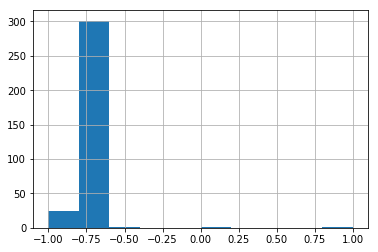

In [108]:
treino_x_scaled['m9_OBV_ret10'].hist()
plt.show()

(array([  4.,   3.,  16.,  44., 108.,  89.,  41.,  18.,   3.,   3.]),
 array([-9.15492958, -7.33292104, -5.5109125 , -3.68890396, -1.86689542,
        -0.04488689,  1.77712165,  3.59913019,  5.42113873,  7.24314727,
         9.06515581]),
 <a list of 10 Patch objects>)

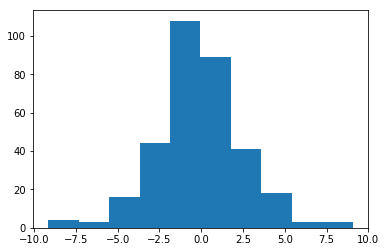

In [109]:
plt.hist(otimizacao_treino['PercentualSetupBruto'])

In [110]:
from sklearn.feature_selection import RFE

In [111]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [112]:
mqo_base = LinearRegression()
extrair_variaveis = RFE(mqo_base, n_features_to_select= 60).fit(treino_x_scaled, treino_y)
variaveis_selecionadas_regressao = extrair_variaveis.get_support()

variaveis_selecionadas_regressao_ = []
for i in range(len(variaveis_selecionadas_regressao)):
    if(variaveis_selecionadas_regressao[i] == True):
        variaveis_selecionadas_regressao_.append(treino_x_scaled.columns[i])
        

In [113]:
variaveis_selecionadas_regressao_

['GAP t-1',
 'Close_Medio',
 'Open_Medio',
 'Close_High',
 'Close_Low',
 'Close_Open',
 'Open_High',
 'Open_Low',
 'Close_Medio t - 1',
 'Close_Medio t - 2',
 'Close_Medio t - 11',
 'Close_Medio t - 14',
 'Close_Medio t - 18',
 'Close_Medio t - 19',
 'Open_Medio t - 2',
 'Open_Medio t - 9',
 'Open_Medio t - 18',
 'Open_Medio t - 19',
 'Close_High t - 1',
 'Close_High t - 2',
 'Close_High t - 11',
 'Close_High t - 14',
 'Close_High t - 18',
 'Close_Low t - 1',
 'Close_Low t - 2',
 'Close_Low t - 11',
 'Close_Low t - 14',
 'Close_Low t - 15',
 'Close_Low t - 18',
 'Close_Low t - 19',
 'Close_Open t - 2',
 'Close_Open t - 15',
 'Close_Open t - 18',
 'Open_Low t - 15',
 'Open_Low t - 18',
 'Open_Low t - 19',
 'GAP t - 1',
 'Volume_vs_m20',
 'Volume_vs_m20 t -1',
 'Volume_vs_m20 t -2',
 'Volume_vs_m20 t -3',
 'Volume_vs_m20 t -4',
 'Volume_vs_m20 t -5',
 'Volume_vs_m20 t -6',
 'Volume_vs_m20 t -7',
 'Volume_vs_m20 t -8',
 'Volume_vs_m20 t -9',
 'Volume_vs_m20 t -10',
 'Retorno VolatilidadeR

In [117]:
treino_x_regressao = treino_x[variaveis_selecionadas_regressao_[0]]

treino_x_regressao_minmax = treino_x_scaled[variaveis_selecionadas_regressao_[0]]


teste_x_regressao_minmax = teste_x_scaled[variaveis_selecionadas_regressao_[0]]
for i in range(1, len(variaveis_selecionadas_regressao_)):
    treino_x_regressao_minmax = pd.concat((treino_x_regressao_minmax, 
                                   treino_x_scaled[variaveis_selecionadas_regressao_[i]]), axis = 1)
    
    teste_x_regressao_minmax = pd.concat((teste_x_regressao_minmax, 
                                   teste_x_scaled[variaveis_selecionadas_regressao_[i]]), axis = 1)
    
    treino_x_regressao = pd.concat((treino_x_regressao, 
                                   treino_x[variaveis_selecionadas_regressao_[i]]), axis = 1)
    

In [118]:
treino_x_regressao.head()

,GAP t-1,Close_Medio,Open_Medio,Close_High,Close_Low,Close_Open,Open_High,Open_Low,Close_Medio t - 1,Close_Medio t - 2,...,VR Média 5 t-1,Retorno VolatilidadeReal t-1,Retorno VolatilidadeReal t-2,Retorno VolatilidadeReal t-3,Retorno VolatilidadeReal t-4,Retorno VolatilidadeReal t-5,LR_Liquidez,GB_Volatilidade,RF_Volatilidade,LR_Volatilidade
0,-0.21,-1.543210,1.728395,-3.450363,0.440806,-3.216019,-0.242131,3.778338,-0.722892,0.088836,...,204.767836,305.134110,-43.823615,498.862985,230.571417,33.094291,17.366493,0.708855,0.708855,0.708855
1,-0.17,-0.241692,-0.181269,-0.840841,0.364742,-0.060533,-0.780781,0.425532,-0.541842,0.178147,...,4519.402898,2611.630788,-48.562677,1300.022316,-98.338723,18832.262793,10.468984,0.737302,0.737302,0.737302
2,-0.01,-0.421053,0.350877,-0.907821,0.070522,-0.769231,-0.139665,0.846262,0.052493,-0.121760,...,145.367895,645.023828,-99.900278,144.957231,59.855741,-23.097041,-9.260956,0.342120,0.342120,0.342120
3,-0.08,-0.033234,0.564972,-0.594845,0.534759,-0.594845,0.000000,1.136364,0.033058,-0.098328,...,154.397204,396.775108,457.719439,-56.787195,-27.057300,1.335972,2.091347,0.193849,0.193849,0.193849
4,0.00,-0.179718,-0.436457,-0.613497,0.257865,0.257865,-0.869121,0.000000,-0.100908,0.126231,...,227.806924,-53.646536,1274.674936,-4.368920,-77.678489,0.053634,10.887216,0.240696,0.240696,0.240696


In [119]:
mqo_bruto = OLS(treino_y, treino_x).fit()

mqo_otimizado_1 = OLS(treino_y.iloc[:,0:1], treino_x_regressao).fit()

mqo_otimizado_2 = OLS(treino_y.iloc[:,0:1], treino_x_regressao_minmax).fit()

In [120]:
mqo_otimizado_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     PercentualSetupBruto   R-squared (uncentered):                   0.482
Model:                              OLS   Adj. R-squared (uncentered):              0.381
Method:                   Least Squares   F-statistic:                              4.742
Date:                  Sun, 11 Oct 2020   Prob (F-statistic):                    3.92e-18
Time:                          23:01:23   Log-Likelihood:                         -670.12
No. Observations:                   329   AIC:                                      1448.
Df Residuals:                       275   BIC:                                      1653.
Df Model:                            54                                                  
Covariance Type:              nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
GAP t-1                          0.5078      0.329      1.542      0.124      -0.141       1.156
Close_Medio                   1132.1675   7148.802      0.158      0.874   -1.29e+04    1.52e+04
Open_Medio                   -1235.3631   7115.374     -0.174      0.862   -1.52e+04    1.28e+04
Close_High                    -534.2270   3655.033     -0.146      0.884   -7729.626    6661.172
Close_Low                     -536.4813   3488.224     -0.154      0.878   -7403.497    6330.534
Close_Open                     -59.2480     29.878     -1.983      0.048    -118.068      -0.428
Open_High                      586.6260   3638.039      0.161      0.872   -6575.319    7748.571
Open_Low                       588.6350   3471.711      0.170      0.865   -6245.873    7423.143
Close_Medio t - 1               51.0818     19.144      2.668      0.008      13.395      88.769
Close_Medio t - 2             -184.4346    325.838     -0.566      0.572    -825.888     457.019
Close_Medio t - 11            -218.0669     78.879     -2.765      0.006    -373.350     -62.784
Close_Medio t - 14            -245.3818     79.332     -3.093      0.002    -401.556     -89.208
Close_Medio t - 18             194.9071     71.439      2.728      0.007      54.270     335.544
Close_Medio t - 19              40.1408     22.264      1.803      0.072      -3.689      83.971
Open_Medio t - 2              -325.2701    165.823     -1.962      0.051    -651.713       1.173
Open_Medio t - 9                -0.3153      0.200     -1.574      0.117      -0.710       0.079
Open_Medio t - 18              154.7806     64.338      2.406      0.017      28.123     281.439
Open_Medio t - 19              -38.8728     22.114     -1.758      0.080     -82.407       4.661
Close_High t - 1               -26.1843      9.920     -2.640      0.009     -45.713      -6.656
Close_High t - 2               257.3184    202.826      1.269      0.206    -141.970     656.607
Close_High t - 11              110.6874     40.037      2.765      0.006      31.869     189.506
Close_High t - 14              124.5510     40.256      3.094      0.002      45.301     203.801
Close_High t - 18             -175.5737     65.622     -2.676      0.008    -304.758     -46.389
Close_Low t - 1                -24.7063      9.206     -2.684      0.008     -42.830      -6.582
Close_Low t - 2                255.4072    200.930      1.271      0.205    -140.150     650.964
Close_Low t - 11               108.5173     38.923      2.788      0.006      31.892     185.143
Close_Low t - 14               121.0862     39.004      3.104      0.002      44.302     197.870
Close_Low t - 15               -47.5669     22.346  

In [121]:
for i in range(len(treino_x_regressao.columns)):
    
    var_ = treino_x_regressao.columns[i]
    
    mqo_ = OLS(treino_y.iloc[:,0:1], treino_x_regressao_minmax[var_]).fit()
    
    print(var_ + ' R² : ' + str(mqo_.rsquared * 100) + ' Coef Deter. : ' +str((mqo_.rsquared **2) * 100) )



GAP t-1 R² : 0.1952753472655444 Coef Deter. : 0.0003813246124967896
Close_Medio R² : 15.866491089739998 Coef Deter. : 2.5174553950079877
Open_Medio R² : 14.611777423053828 Coef Deter. : 2.135040394608656
Close_High R² : 0.8578593272893231 Coef Deter. : 0.007359226254172901
Close_Low R² : 7.127072266832135 Coef Deter. : 0.5079515909664775
Close_Open R² : 16.590487675690614 Coef Deter. : 2.7524428131724212
Open_High R² : 6.773359237944443 Coef Deter. : 0.4587839536624732
Open_Low R² : 1.133373886987521 Coef Deter. : 0.012845363677052019
Close_Medio t - 1 R² : 0.3809988593713953 Coef Deter. : 0.0014516013084230426
Close_Medio t - 2 R² : 0.0016852800503786014 Coef Deter. : 2.8401688482041016e-08
Close_Medio t - 11 R² : 0.7208765356521263 Coef Deter. : 0.005196629796538114
Close_Medio t - 14 R² : 1.4808043078172517 Coef Deter. : 0.0219278139805013
Close_Medio t - 18 R² : 0.2913261380724341 Coef Deter. : 0.0008487091872419896
Close_Medio t - 19 R² : 0.01026145408654644 Coef Deter. : 1.052974

In [124]:
treino_y_inferencia = treino_y
treino_y_inferencia['Previsao'] = mqo_otimizado_2.predict(treino_x_regressao_minmax)

treino_y_inferencia['Sinal'] = np.where(treino_y_inferencia['Previsao'] > 0,1,0)

treino_y_inferencia['Acerto'] = np.where((treino_y_inferencia['Sinal'] == 1) & 
                                         (treino_y_inferencia['PercentualSetupBruto'] > 0),1,
                                         np.where((treino_y_inferencia['Sinal'] == 0) & 
                                         (treino_y_inferencia['PercentualSetupBruto'] < 0),1,0))

print(sum(treino_y_inferencia['Acerto'])/len(treino_y_inferencia))

0.7629179331306991


In [125]:
treino_x_regressao_minmax.columns

Index(['GAP t-1', 'Close_Medio', 'Open_Medio', 'Close_High', 'Close_Low',
       'Close_Open', 'Open_High', 'Open_Low', 'Close_Medio t - 1',
       'Close_Medio t - 2', 'Close_Medio t - 11', 'Close_Medio t - 14',
       'Close_Medio t - 18', 'Close_Medio t - 19', 'Open_Medio t - 2',
       'Open_Medio t - 9', 'Open_Medio t - 18', 'Open_Medio t - 19',
       'Close_High t - 1', 'Close_High t - 2', 'Close_High t - 11',
       'Close_High t - 14', 'Close_High t - 18', 'Close_Low t - 1',
       'Close_Low t - 2', 'Close_Low t - 11', 'Close_Low t - 14',
       'Close_Low t - 15', 'Close_Low t - 18', 'Close_Low t - 19',
       'Close_Open t - 2', 'Close_Open t - 15', 'Close_Open t - 18',
       'Open_Low t - 15', 'Open_Low t - 18', 'Open_Low t - 19', 'GAP t - 1',
       'Volume_vs_m20', 'Volume_vs_m20 t -1', 'Volume_vs_m20 t -2',
       'Volume_vs_m20 t -3', 'Volume_vs_m20 t -4', 'Volume_vs_m20 t -5',
       'Volume_vs_m20 t -6', 'Volume_vs_m20 t -7', 'Volume_vs_m20 t -8',
       'Volume_vs_

In [126]:
teste_y_inferencia = teste_y
teste_y_inferencia['Previsao'] = mqo_otimizado_2.predict(teste_x_regressao_minmax)

teste_y_inferencia['Sinal'] = np.where(teste_y_inferencia['Previsao'] > 0,1,0)

teste_y_inferencia['Acerto'] = np.where((teste_y_inferencia['Sinal'] == 1) & 
                                         (teste_y_inferencia['PercentualSetupBruto'] > 0),1,
                                         np.where((teste_y_inferencia['Sinal'] == 0) & 
                                         (teste_y_inferencia['PercentualSetupBruto'] < 0),1,0))

print(sum(teste_y_inferencia['Acerto'])/len(teste_y_inferencia))

0.5815602836879432


In [127]:
teste_y_inferencia.head()

,PercentualSetupBruto,Previsao,Sinal,Acerto
0,-2.130045,-0.800019,0,1
1,-0.947867,-4.635445,0,1
2,3.219107,-4.246413,0,0
3,2.463054,-0.497538,0,0
4,2.084831,0.603292,1,1


In [128]:
teste_y_inferencia['PercentualOtimizado'] = teste_y_inferencia['Sinal'] * teste_y_inferencia['PercentualSetupBruto']

In [129]:
sharpe_bruto     = (teste_y_inferencia['PercentualSetupBruto'].mean()/teste_y_inferencia['PercentualSetupBruto'].std())
sharpe_otimizado = (teste_y_inferencia['PercentualOtimizado'][teste_y_inferencia['PercentualOtimizado'] != 0].mean()/teste_y_inferencia['PercentualOtimizado'][teste_y_inferencia['PercentualOtimizado'] != 0].std())


tx_acerto_bruta = teste_y_inferencia[teste_y_inferencia['PercentualSetupBruto']>0].shape[0]/len(teste_y_inferencia)

tx_acerto_otimizado = len(teste_y_inferencia[teste_y_inferencia['PercentualOtimizado'] > 0])/len(teste_y_inferencia[teste_y_inferencia['PercentualOtimizado'] != 0])

print('Taxa de Acerto Bruta : ' + str(100 * tx_acerto_bruta))
print('Sharpe Bruto : ' + str(100 * sharpe_bruto))
print('-' * 60)
print('Taxa de Acerto Otimizada : ' + str(100 * tx_acerto_otimizado))
print('Sharpe Otimizado : ' + str(100 * sharpe_otimizado))

Taxa de Acerto Bruta : 57.446808510638306
Sharpe Bruto : 11.27636280967098
------------------------------------------------------------
Taxa de Acerto Otimizada : 67.1875
Sharpe Otimizado : 26.77899677623405


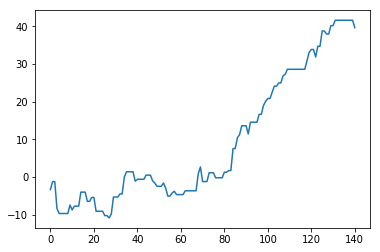

In [135]:
plt.plot(teste_y_inferencia['PercentualOtimizado'].sample(len(teste_y_inferencia)).reset_index().iloc[:,1:].cumsum())

In [136]:
teste_y_inferencia['PercentualOtimizado'].mean()

0.2810280301839148

In [134]:
teste_y_inferencia['PercentualOtimizado'].std()

1.581510678366481

In [137]:
0.2810280301839148/100

0.002810280301839148

In [138]:
1.581510678366481/100

0.01581510678366481